### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

df.sort_values('total_litres_of_pure_alcohol', ascending=False, inplace=True)
df.head(10)

country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245              138            312   
68              Grenada            199              438             28   
61               France            127              151            370   
45       Czech Republic            361              170            134   
141  Russian Federation            247              326             73   
99           Luxembourg            236              133            271   
155            Slovakia            196              293            116   
81              Ireland            313              118            165   

     total_litres_of_pure_alcohol  
15                           14.4  
98                           12.9  
3                            12.4  
68                           11.9  
61                           11.8  
45                           11.8  
141                          11.5  
99                           11.4  
155                          11.4  
81                           11.4

In [60]:
df[["wine_servings", "beer_servings", "spirit_servings"]].mean()

wine_servings       49.450777
beer_servings      106.160622
spirit_servings     80.994819
dtype: float64

In [61]:
df['alcohol_Index'] = (df["wine_servings"]+df["beer_servings"]+df["spirit_servings"])/3
df.head(10)

country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245              138            312   
68              Grenada            199              438             28   
61               France            127              151            370   
45       Czech Republic            361              170            134   
141  Russian Federation            247              326             73   
99           Luxembourg            236              133            271   
155            Slovakia            196              293            116   
81              Ireland            313              118            165   

     total_litres_of_pure_alcohol  alcohol_Index  
15                           14.4     185.666667  
98                           12.9     214.333333  
3                            12.4     231.666667  
68                           11.9     221.666667  
61                           11.8     216.000000  
45                           11.8     221.666667  
141                          11.5     215.333333  
99                           11.4     213.333333  
155                          11.4     201.666667  
81                           11.4     198.666667

In [62]:
drunkestCountry = df[df.alcohol_Index == df.alcohol_Index.max()]
drunkestCountry.country

3    Andorra
Name: country, dtype: object

In [63]:
df[df.beer_servings>100]

country  beer_servings  spirit_servings  wine_servings  \
15      Belarus            142              373             42   
98    Lithuania            343              244             56   
3       Andorra            245              138            312   
68      Grenada            199              438             28   
61       France            127              151            370   
..          ...            ...              ...            ...   
29   Cabo Verde            144               56             16   
170   Macedonia            106               27             86   
20      Bolivia            167               41              8   
146       Samoa            105               18             24   
189     Vietnam            111                2              1   

     total_litres_of_pure_alcohol  alcohol_Index  
15                           14.4     185.666667  
98                           12.9     214.333333  
3                            12.4     231.666667  
68                           11.9     221.666667  
61                           11.8     216.000000  
..                            ...            ...  
29                            4.0      72.000000  
170                           3.9      73.000000  
20                            3.8      72.000000  
146                           2.6      49.000000  
189                           2.0      38.000000  

[79 rows x 6 columns]

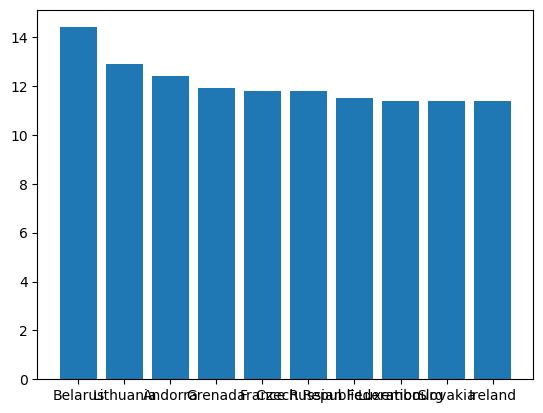

In [66]:
df.sort_values('total_litres_of_pure_alcohol', ascending=False)
plt.bar(df.head(10).country, df.head(10).total_litres_of_pure_alcohol)
plt.show()

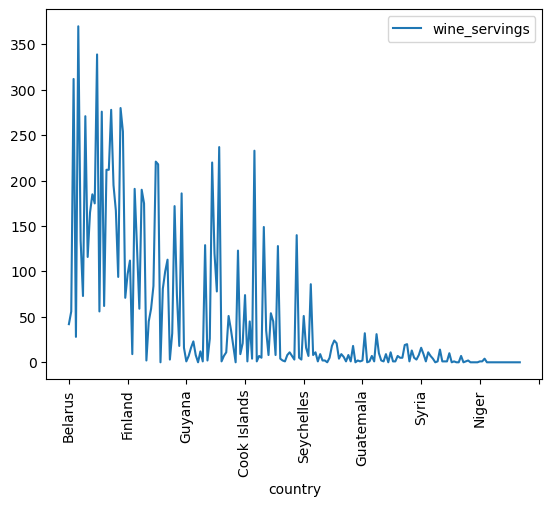

In [68]:
df.sort_values('country')
df.plot(kind='line', y='wine_servings', x='country')
plt.xticks(rotation=90)
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [69]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\i5_10400f\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\i5_10400f\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\i5_10400f\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer

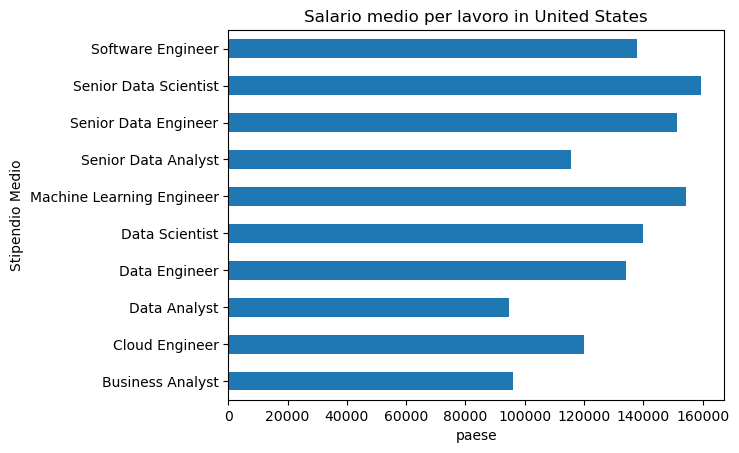

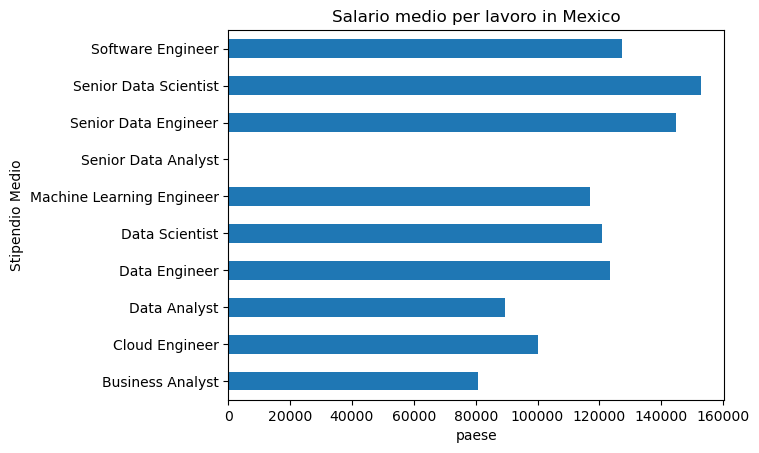

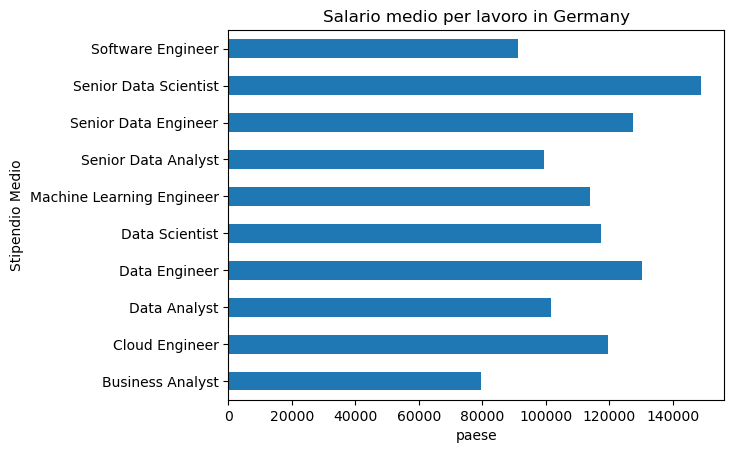

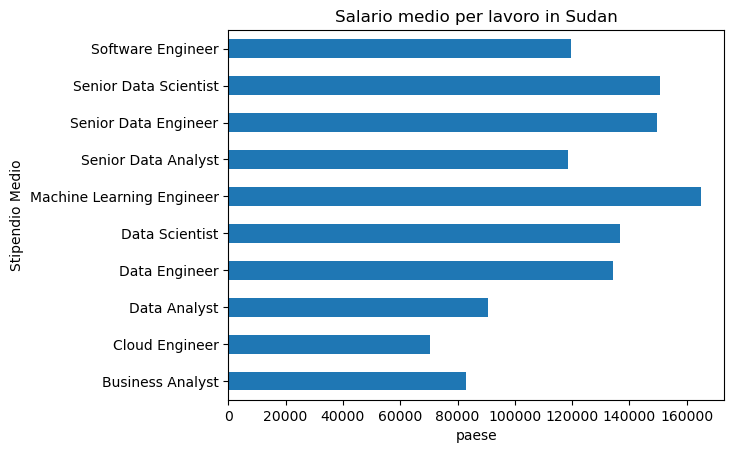

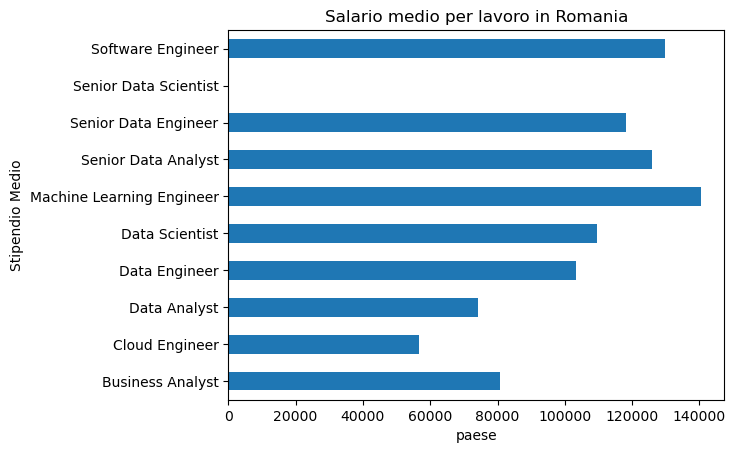

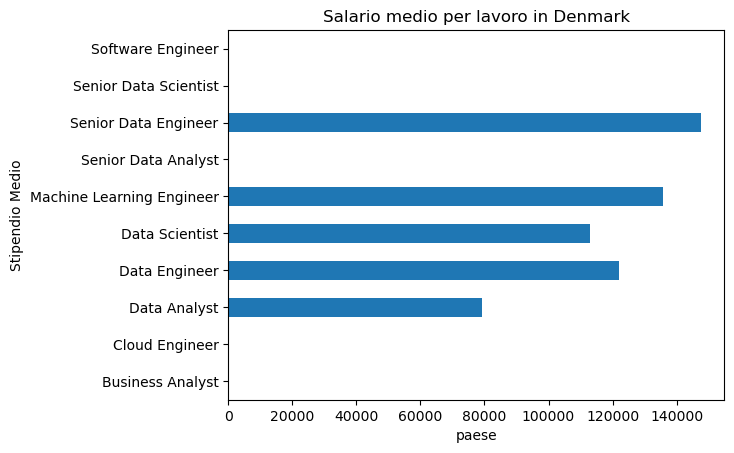

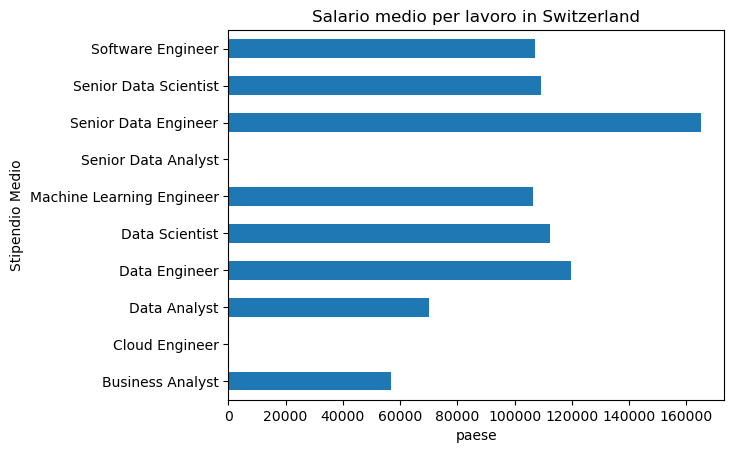

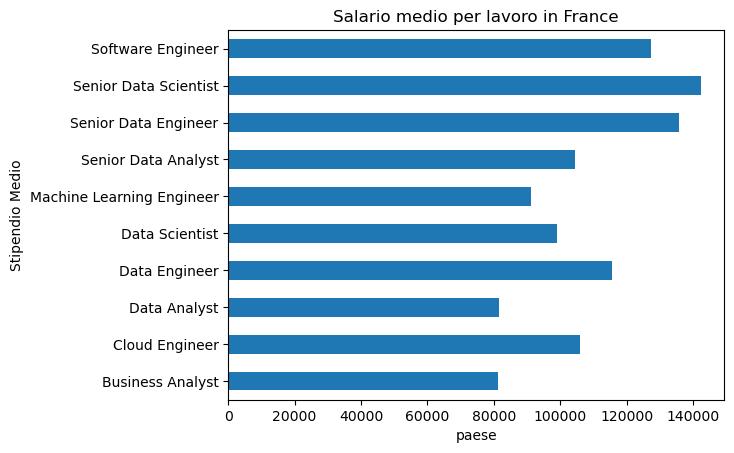

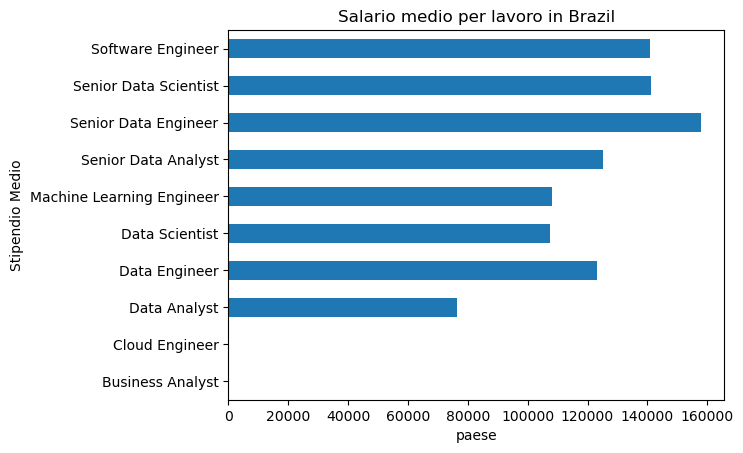

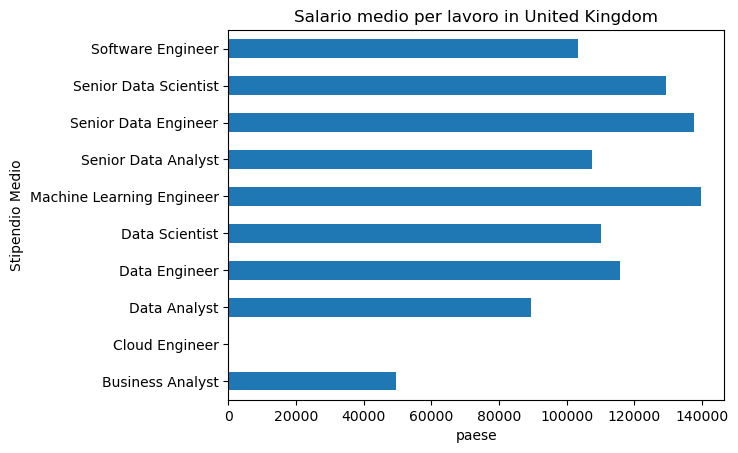

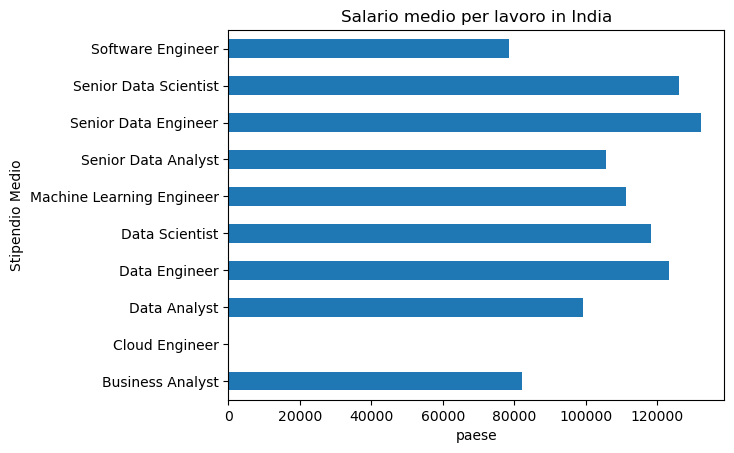

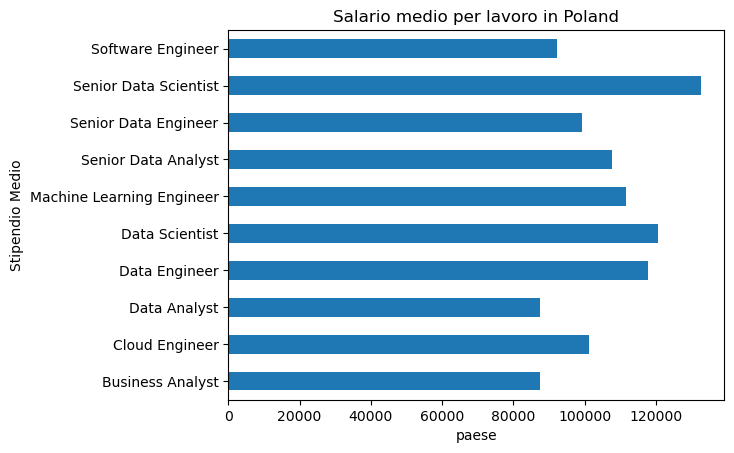

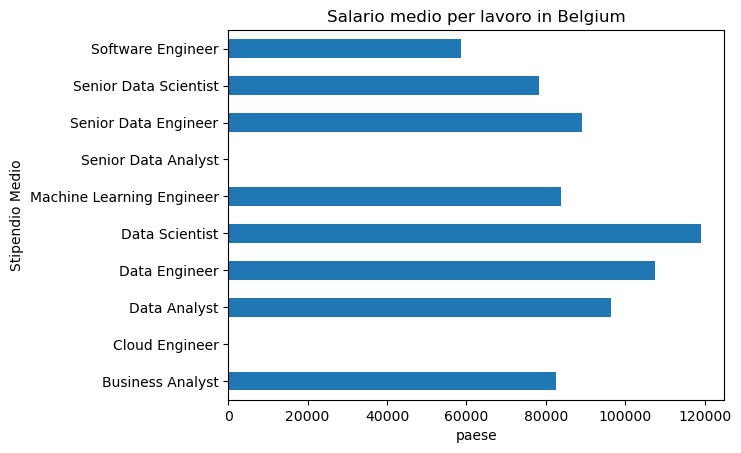

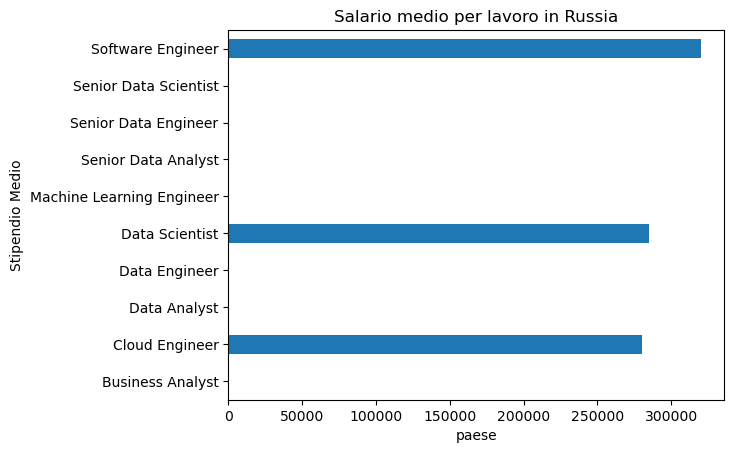

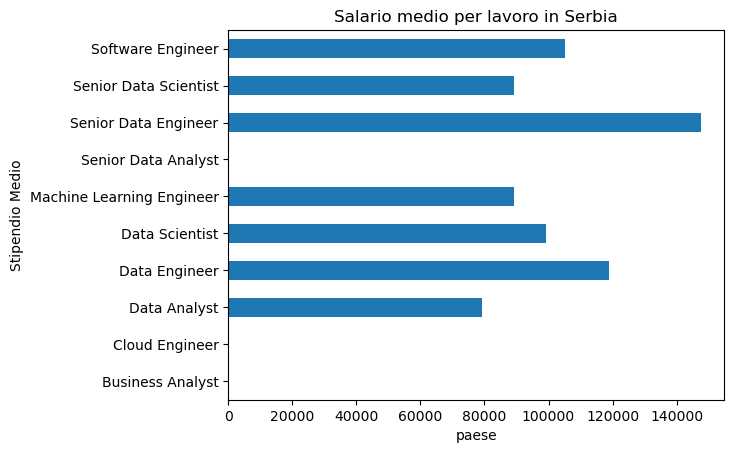

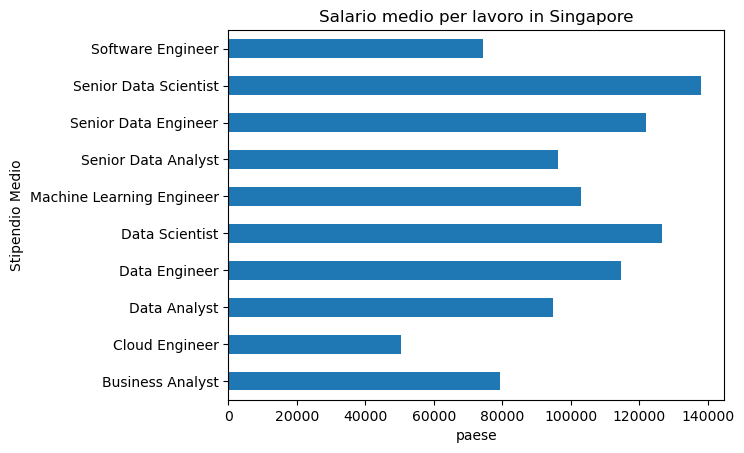

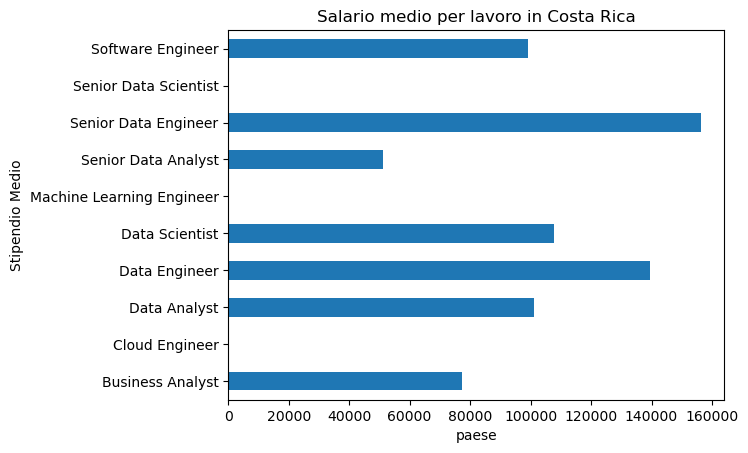

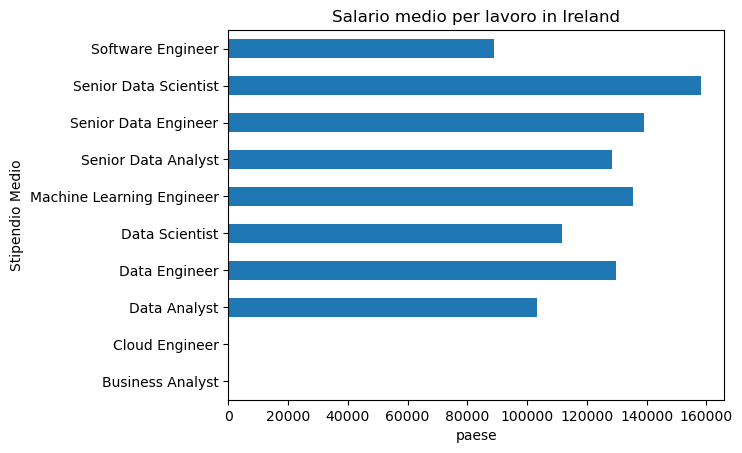

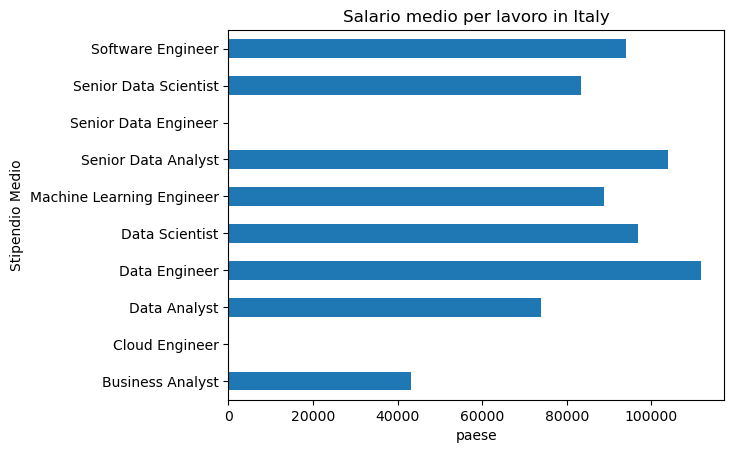

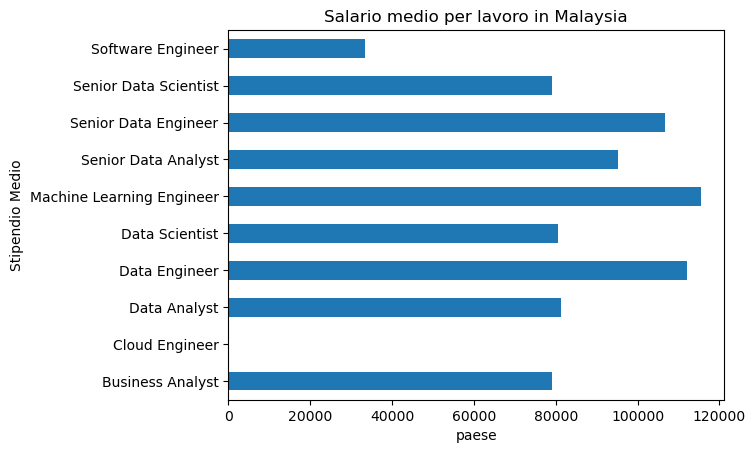

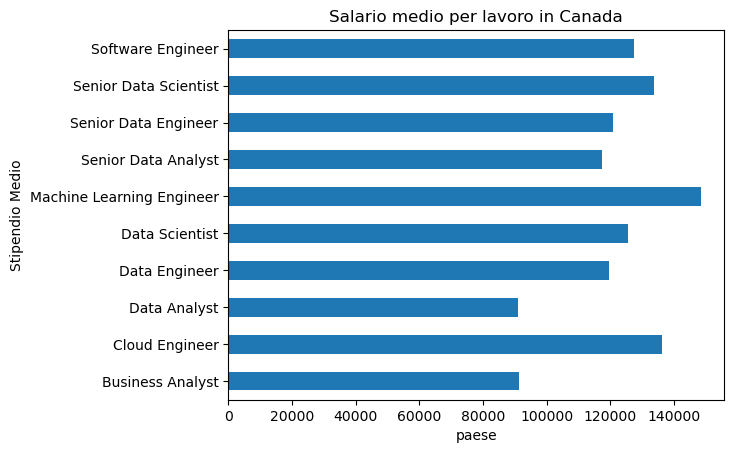

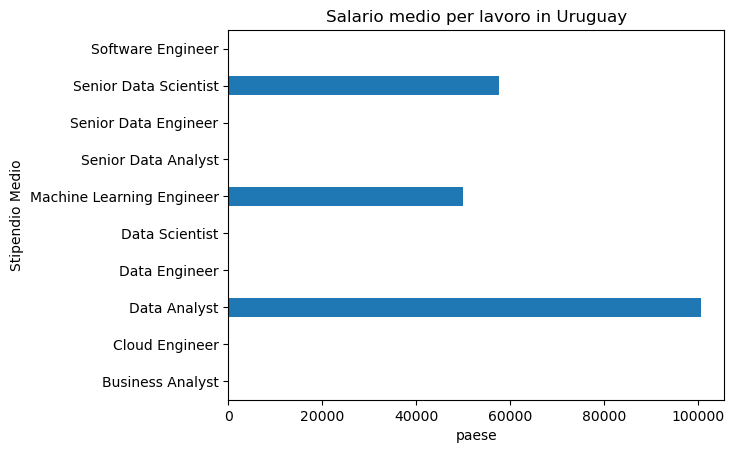

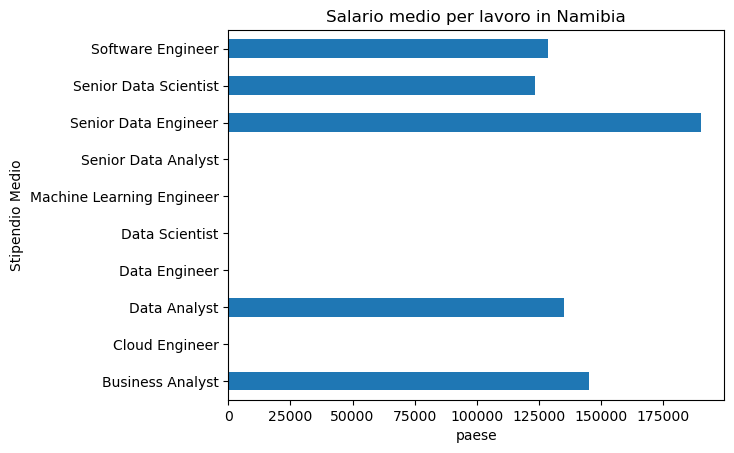

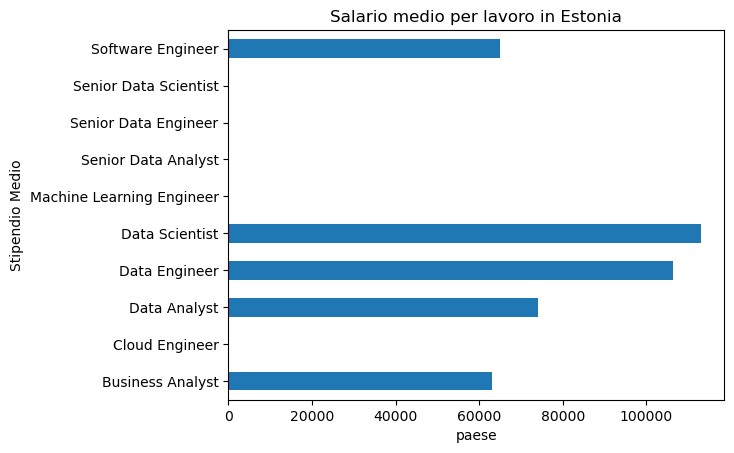

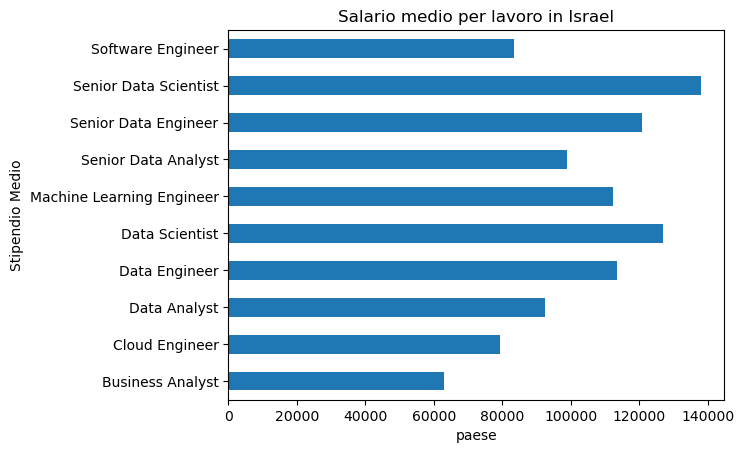

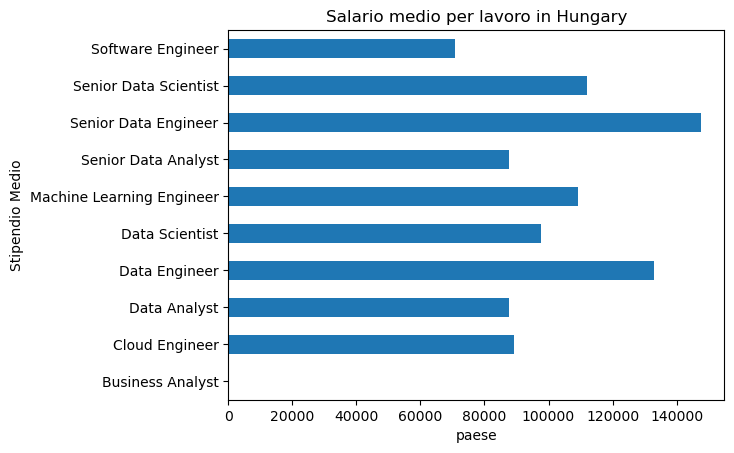

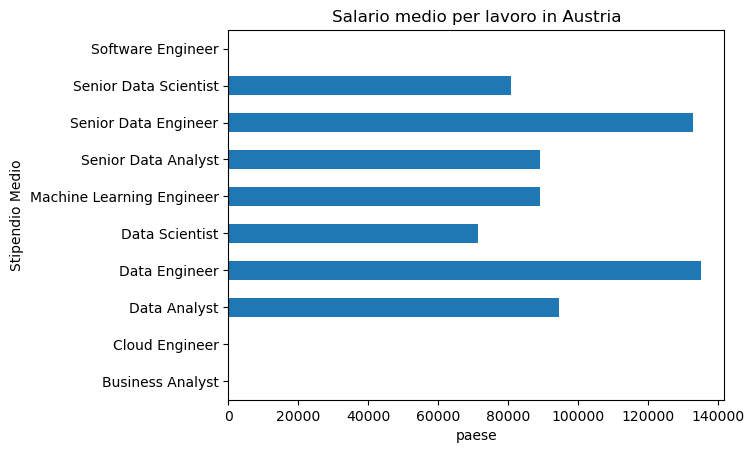

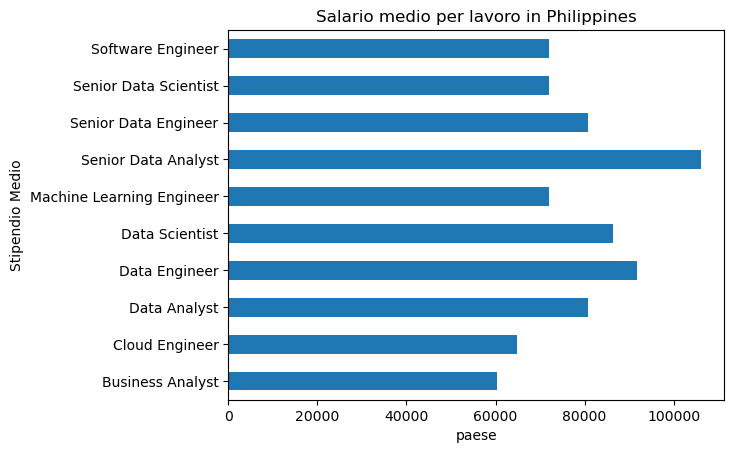

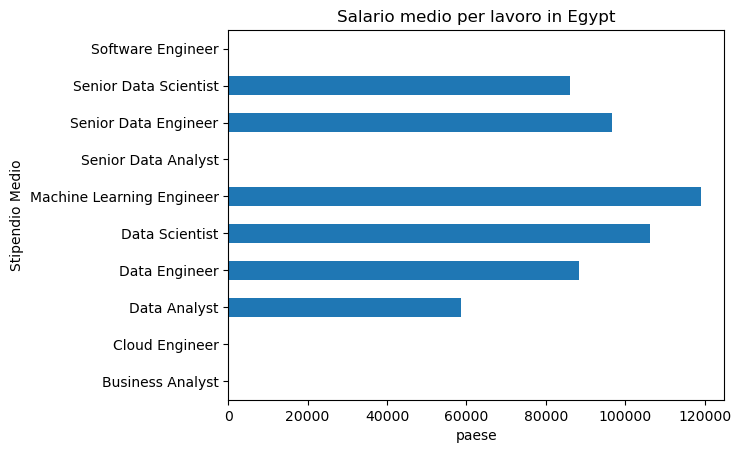

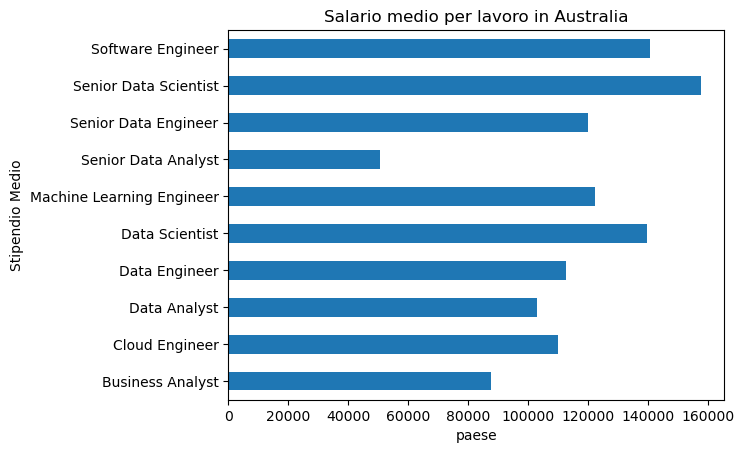

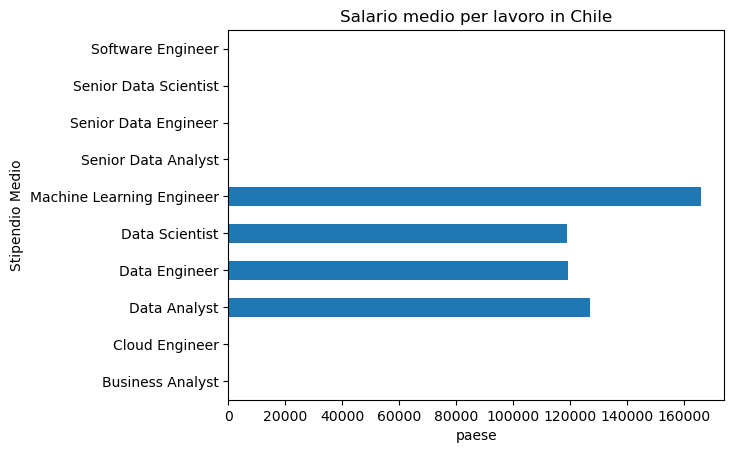

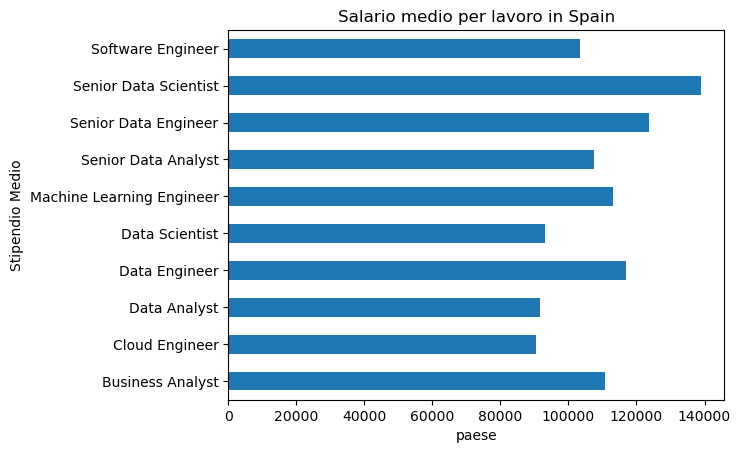

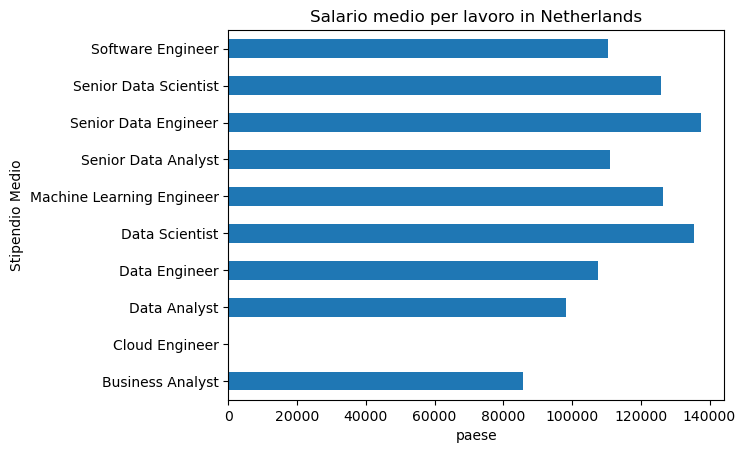

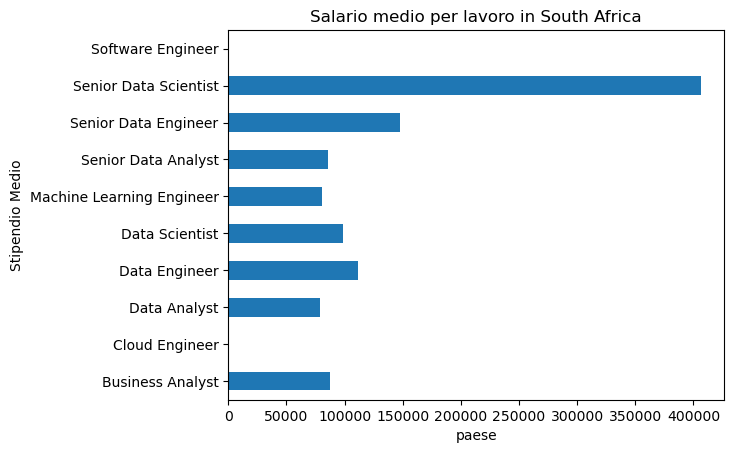

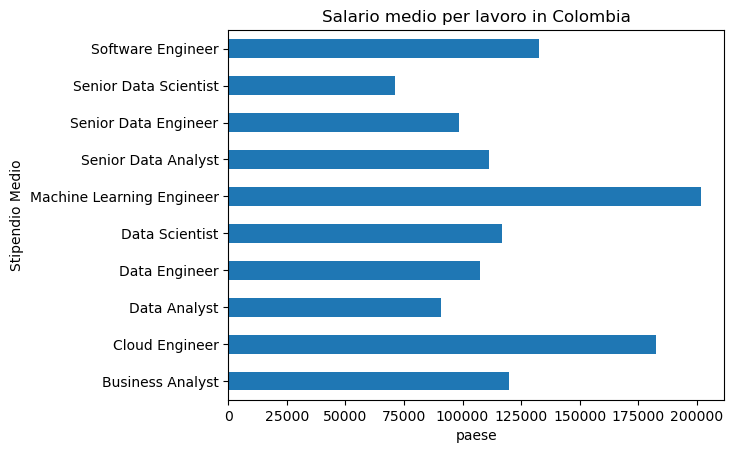

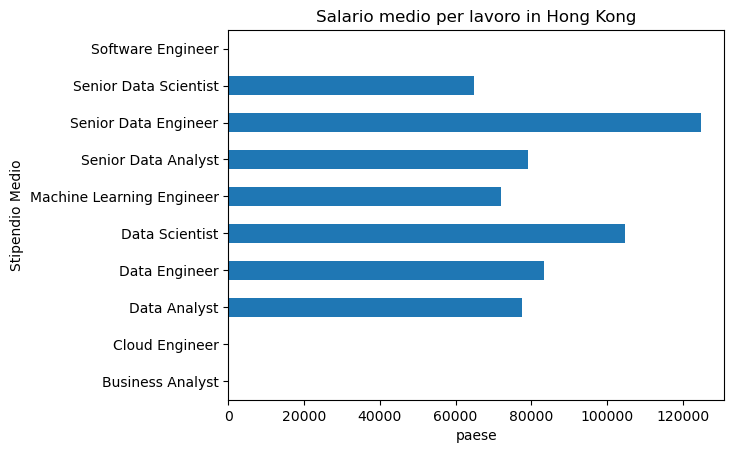

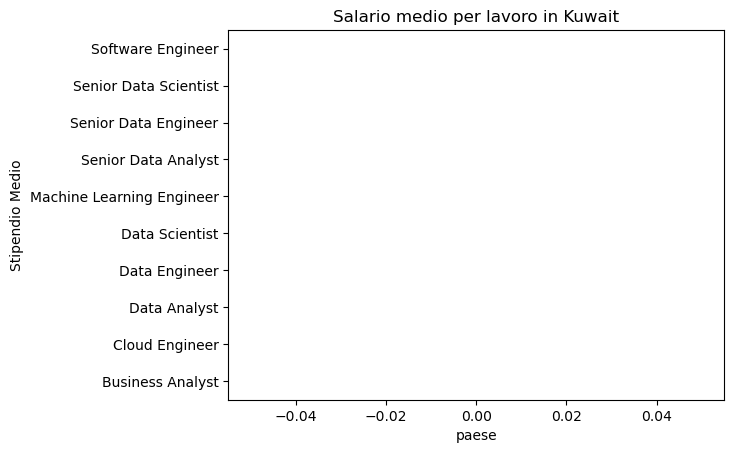

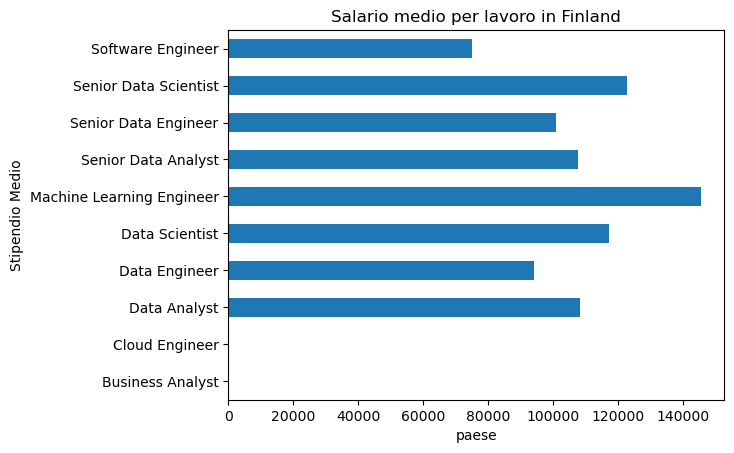

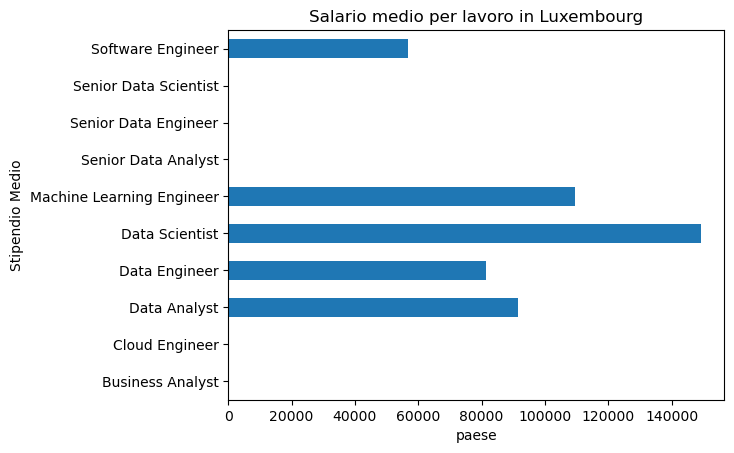

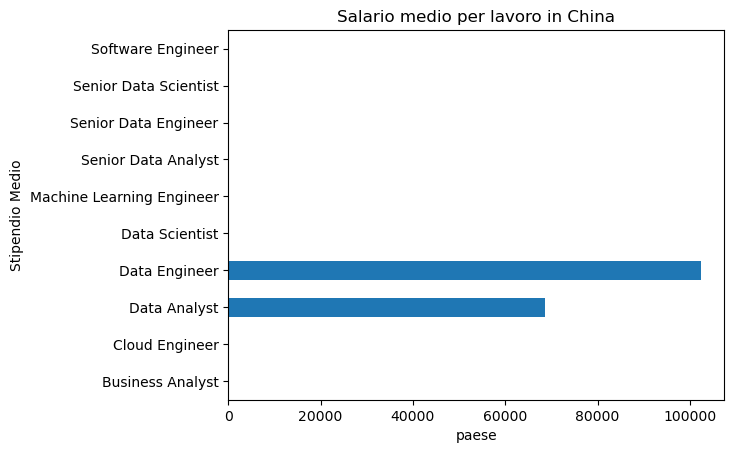

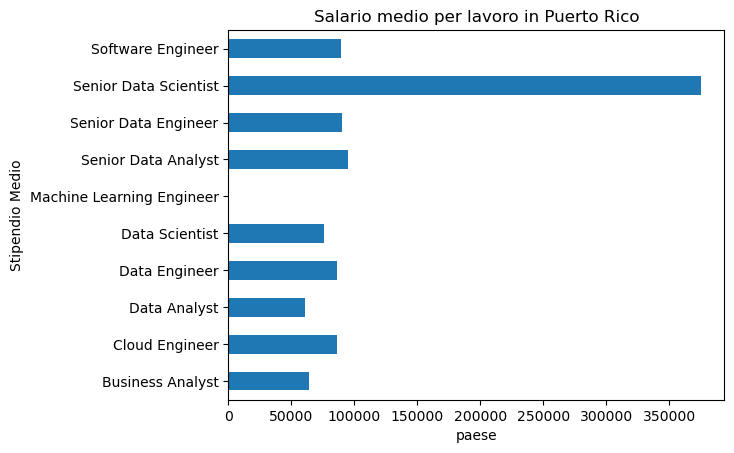

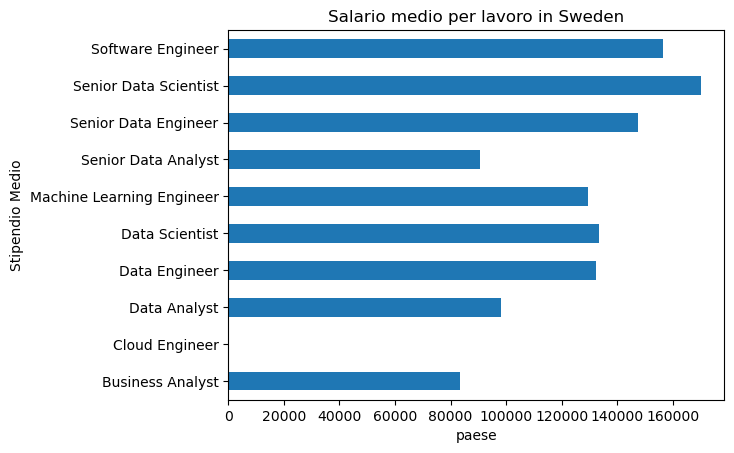

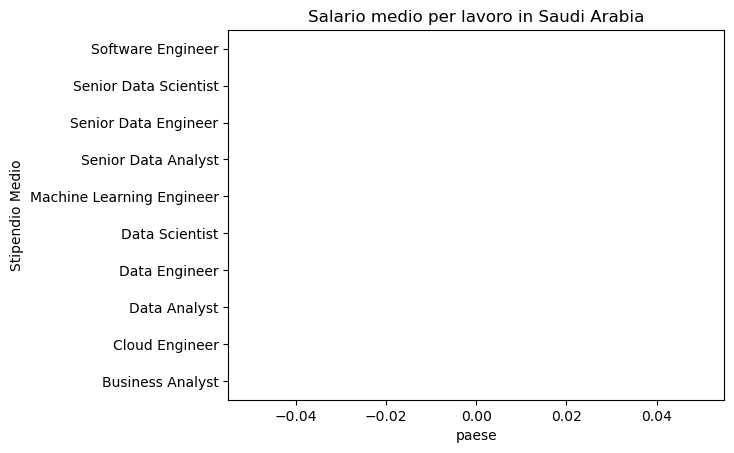

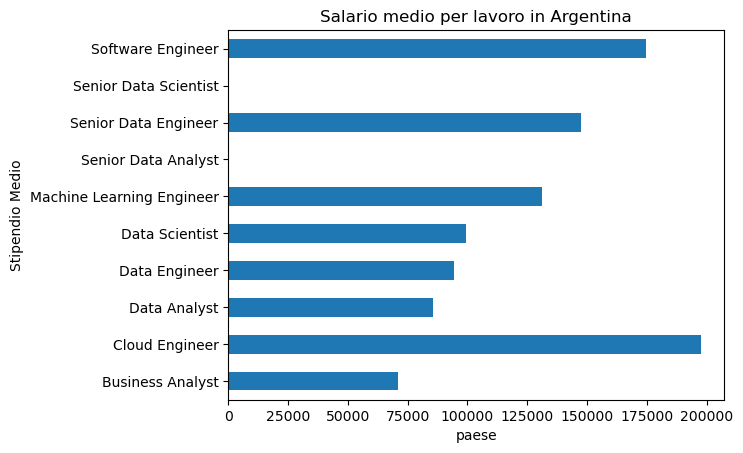

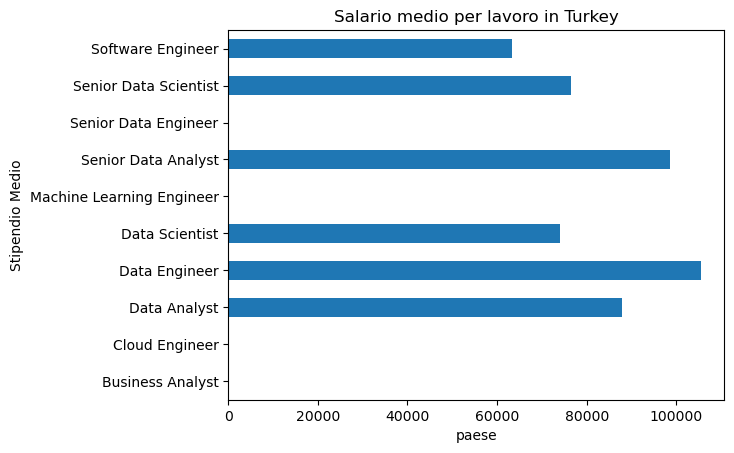

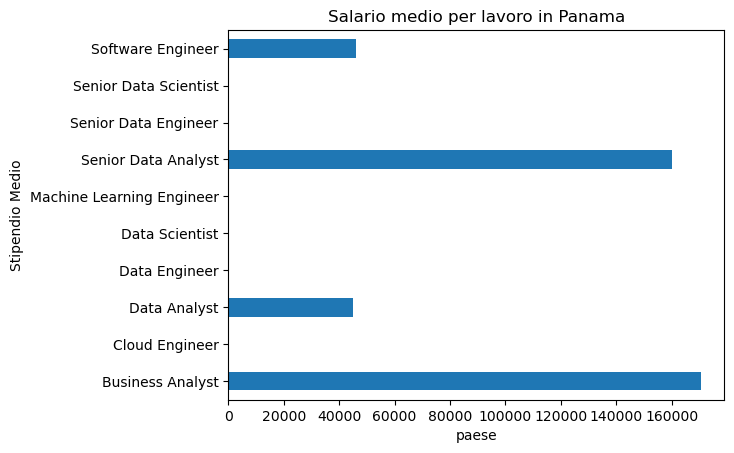

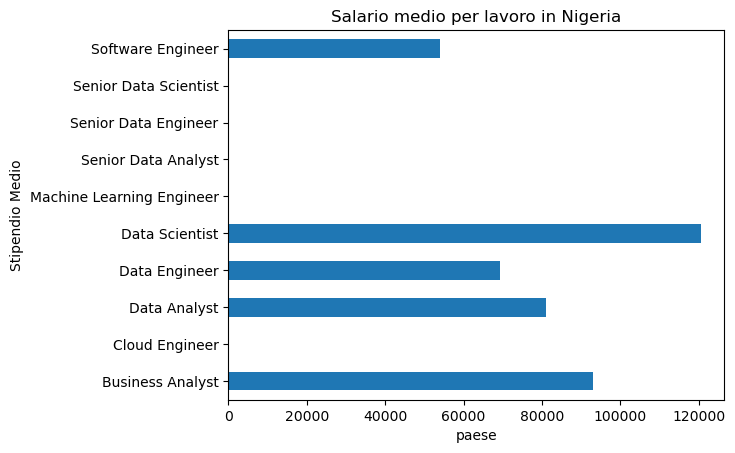

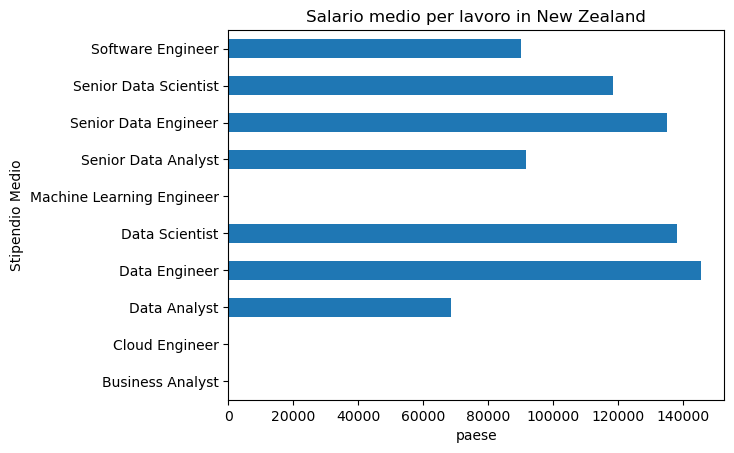

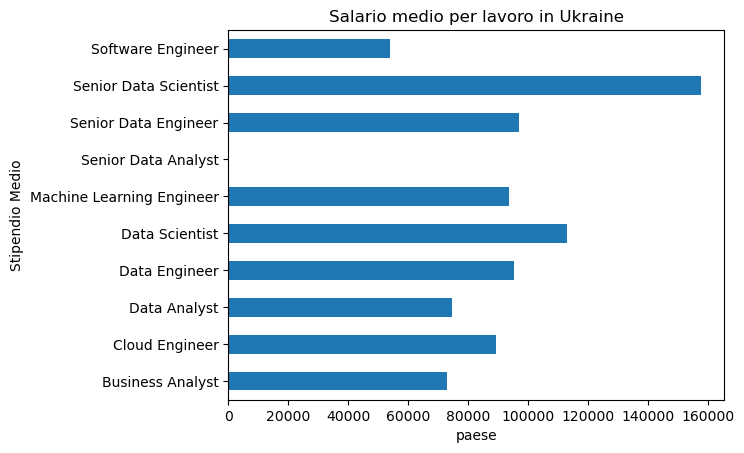

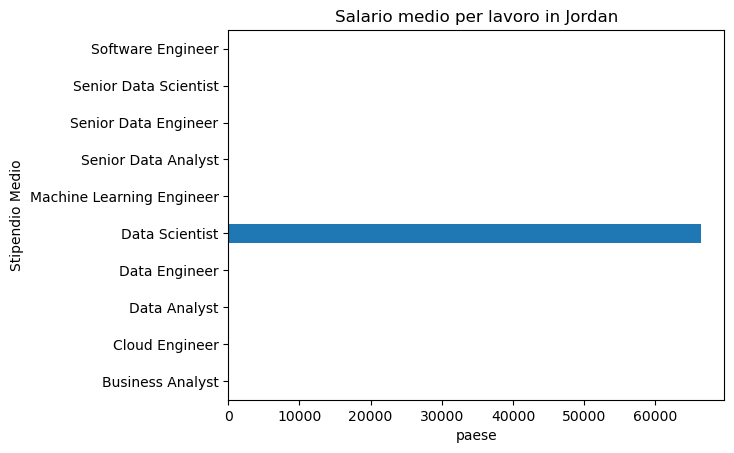

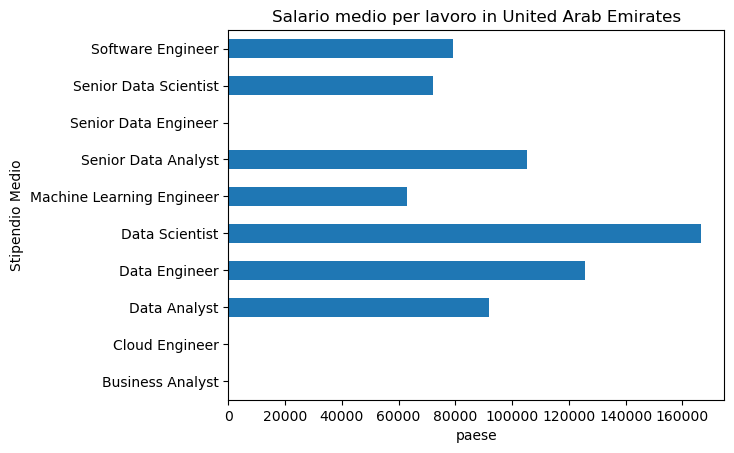

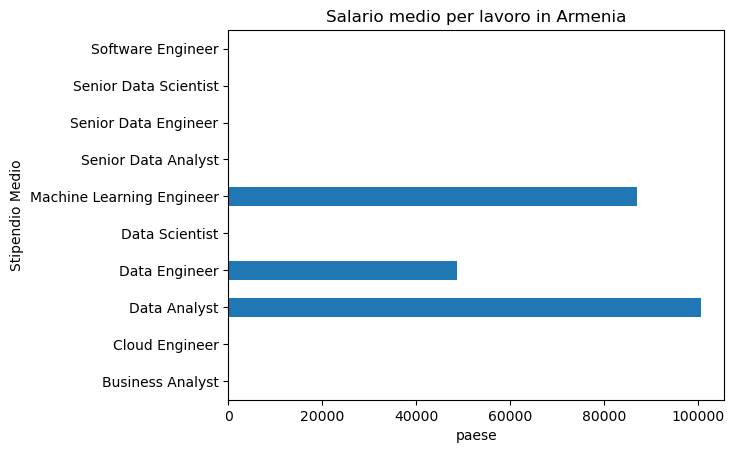

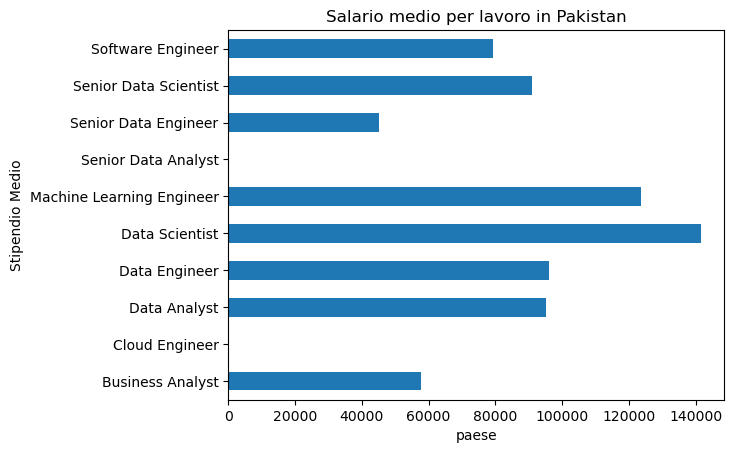

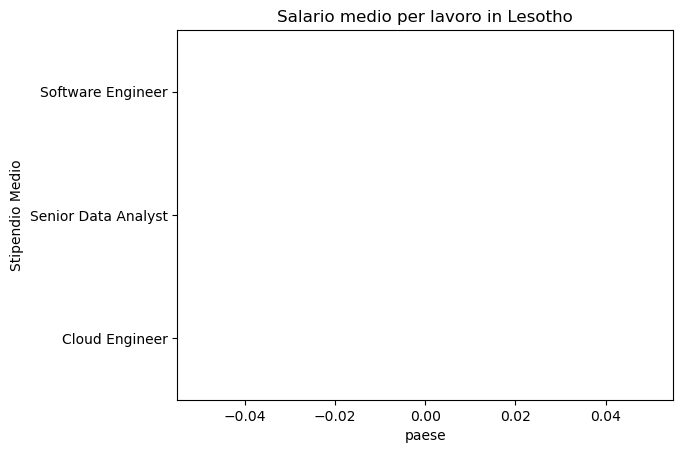

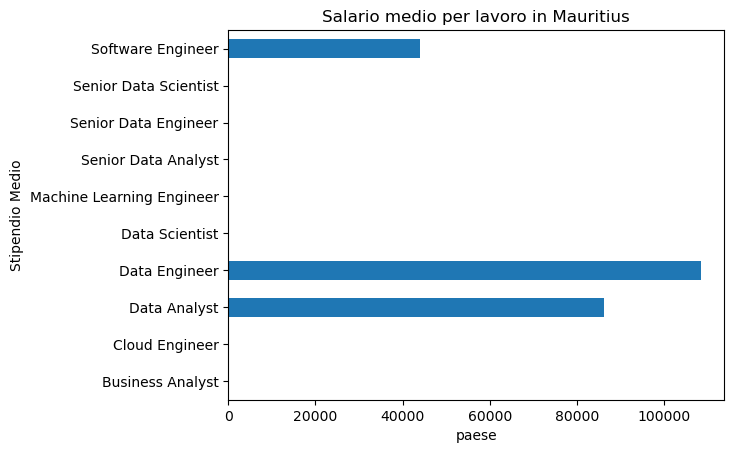

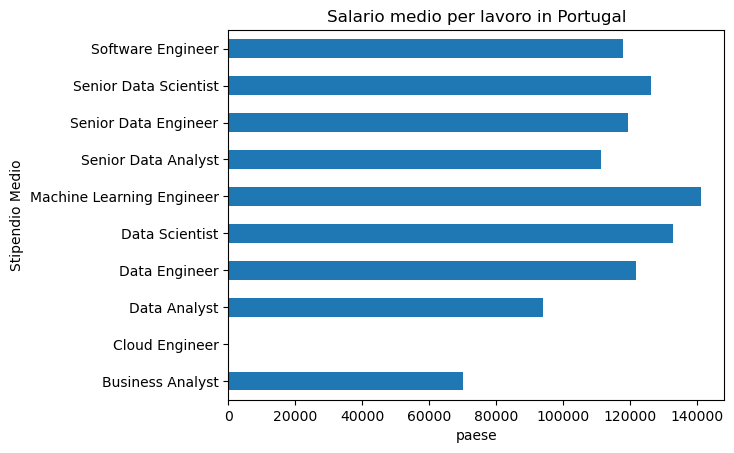

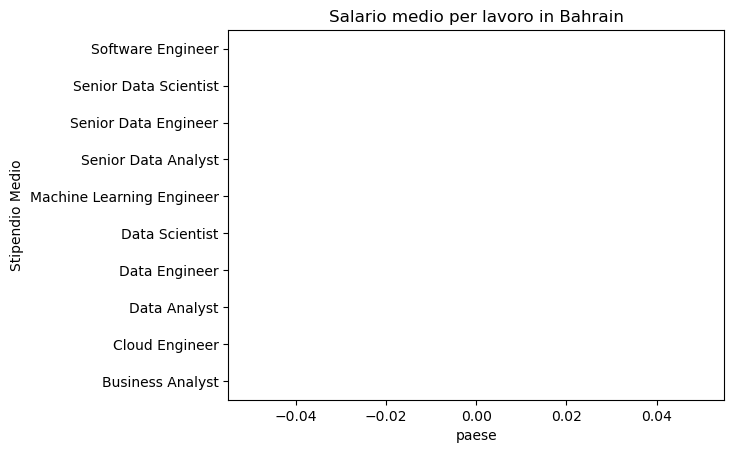

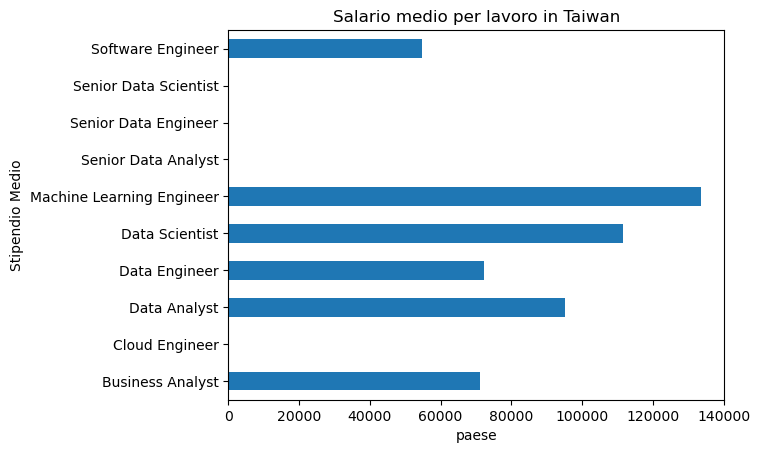

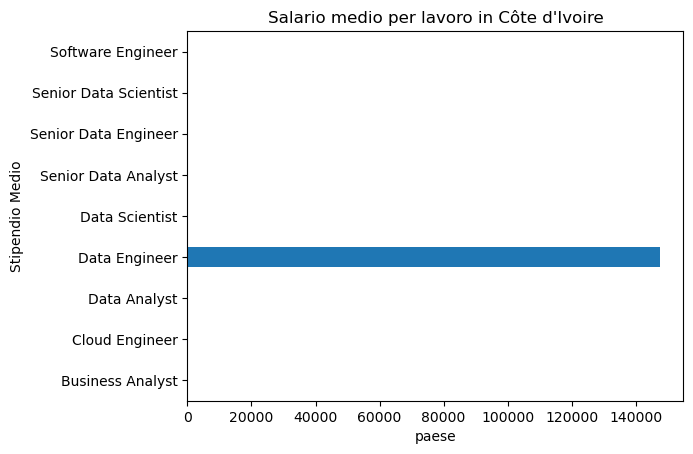

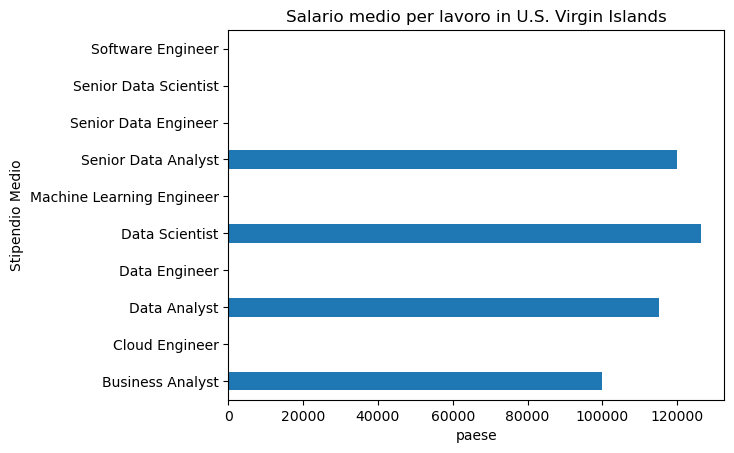

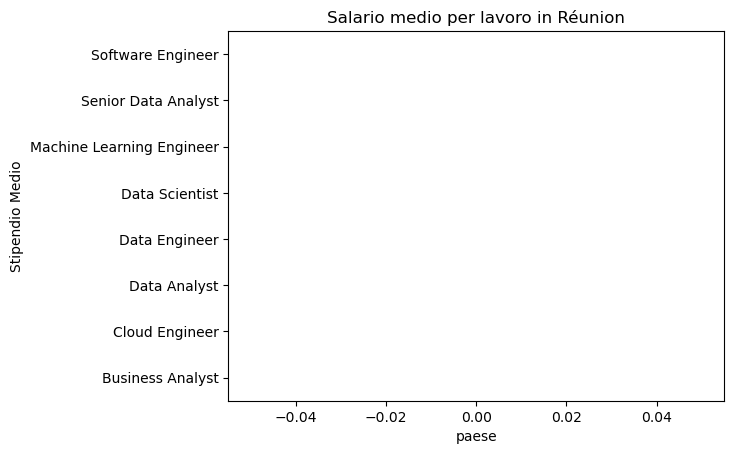

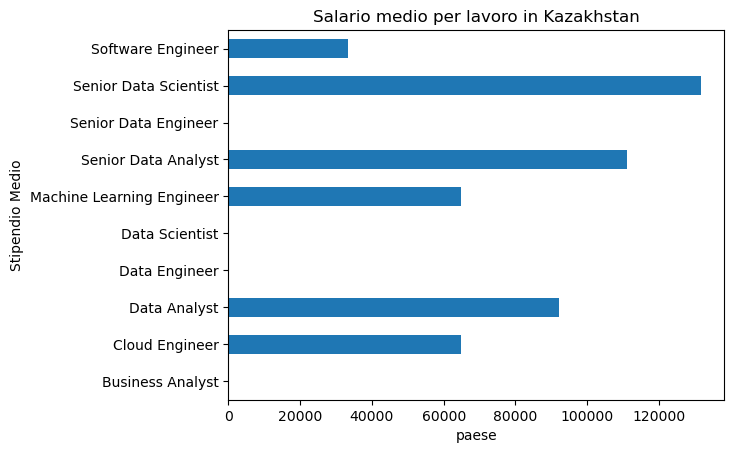

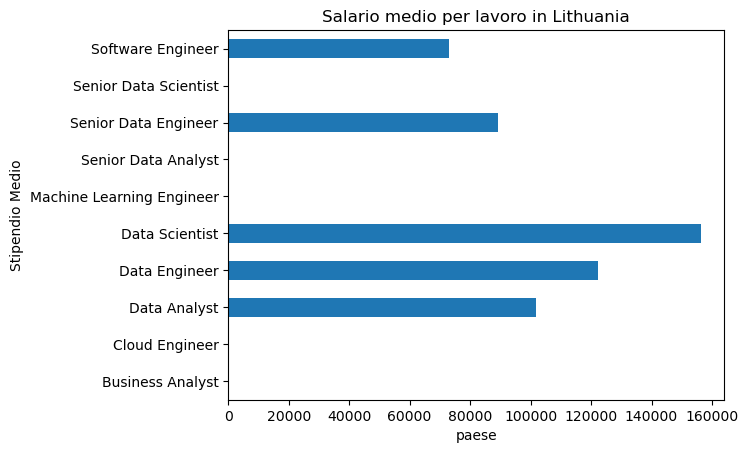

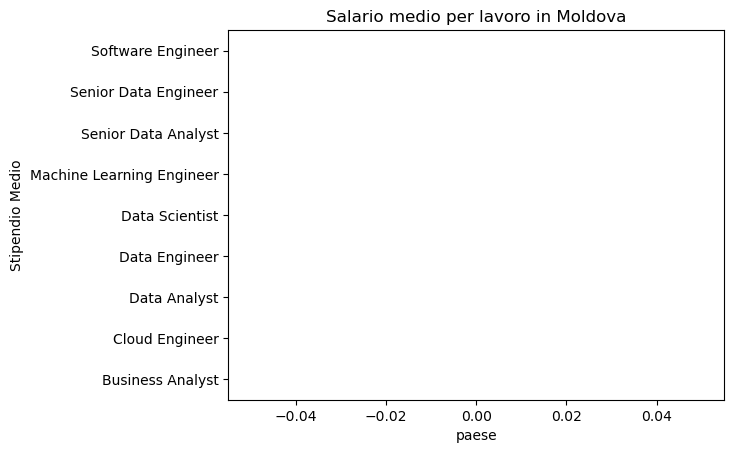

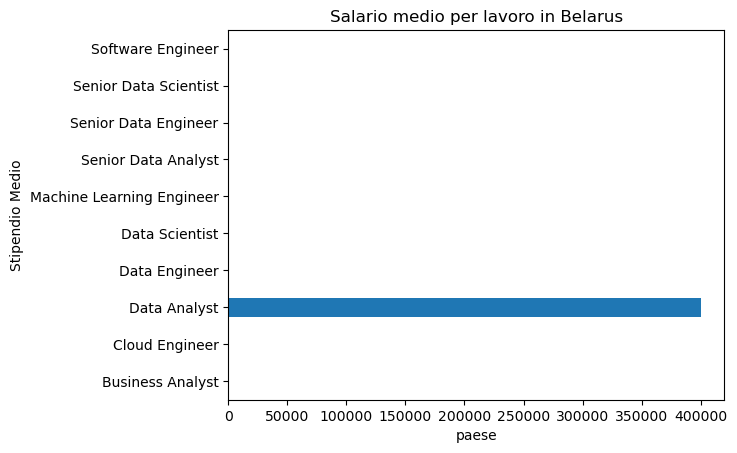

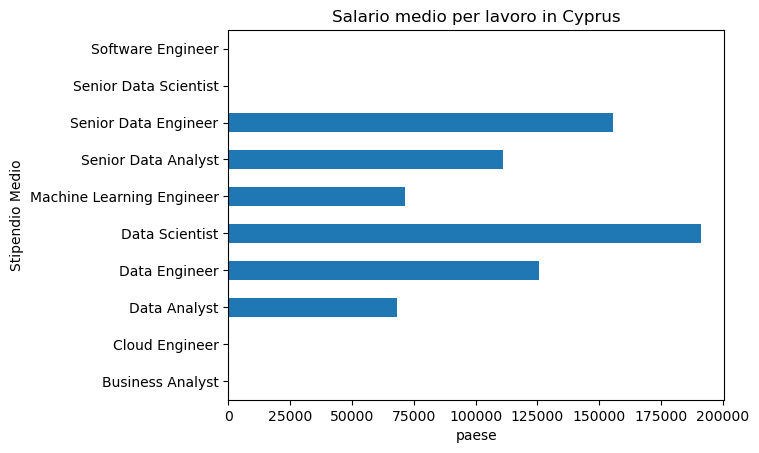

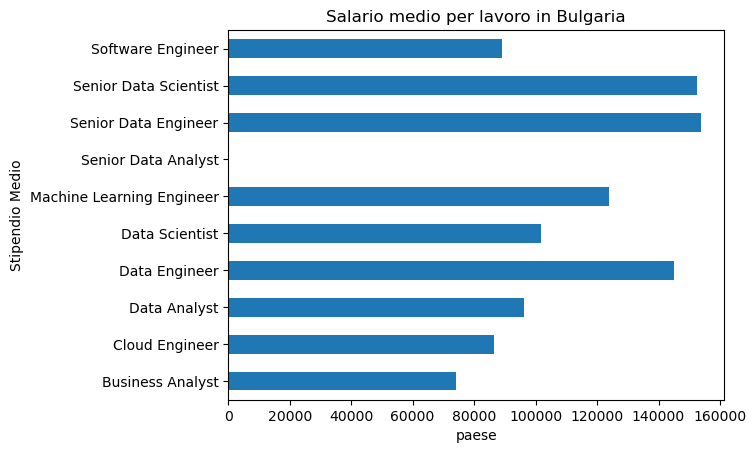

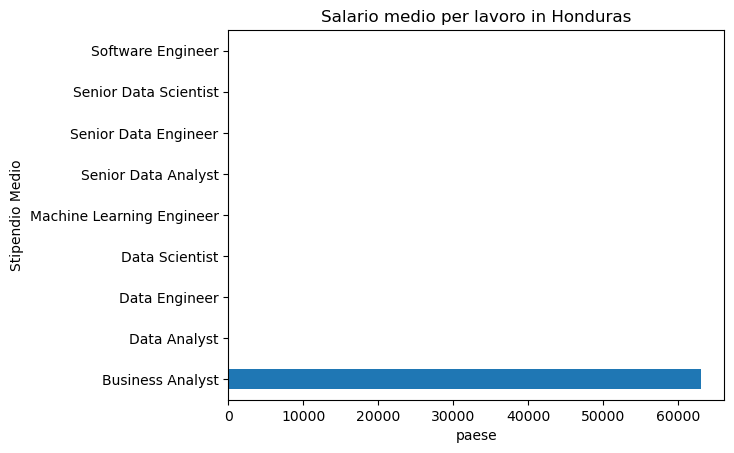

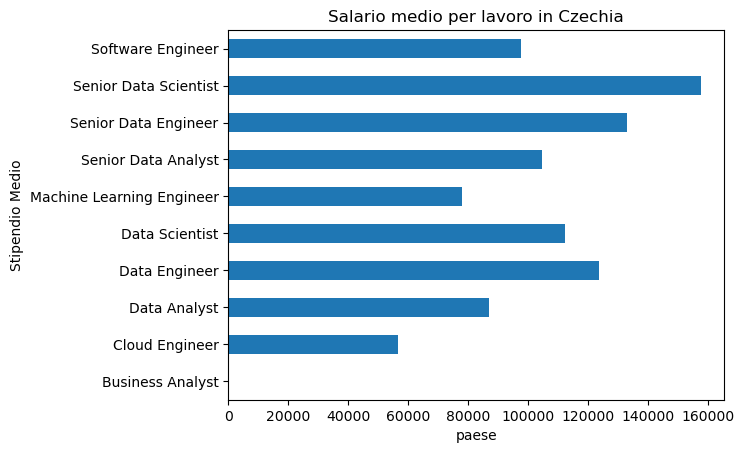

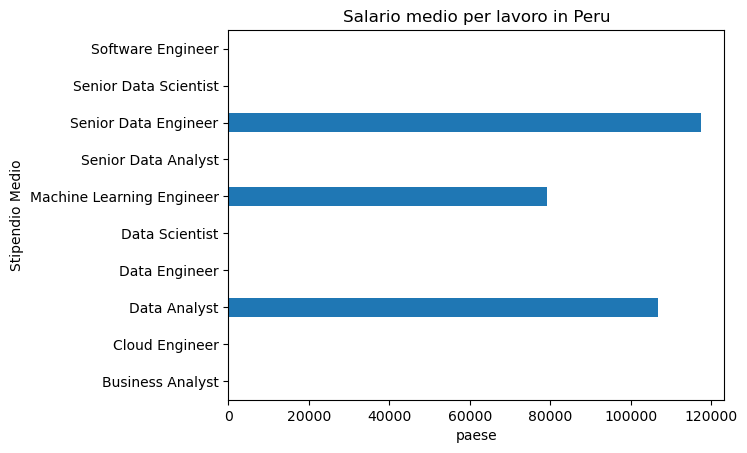

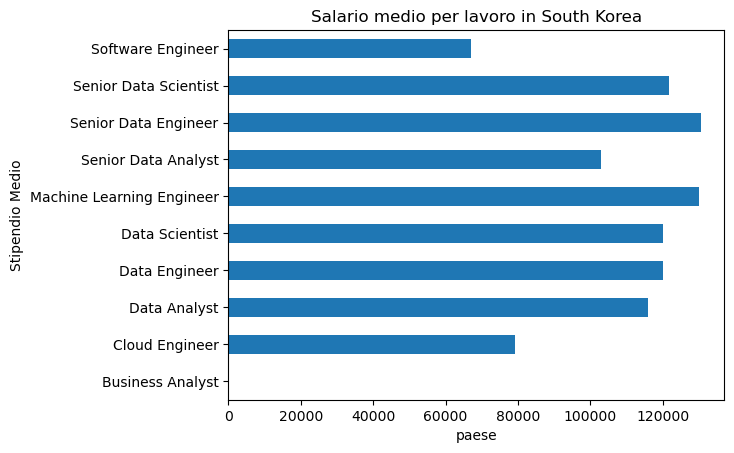

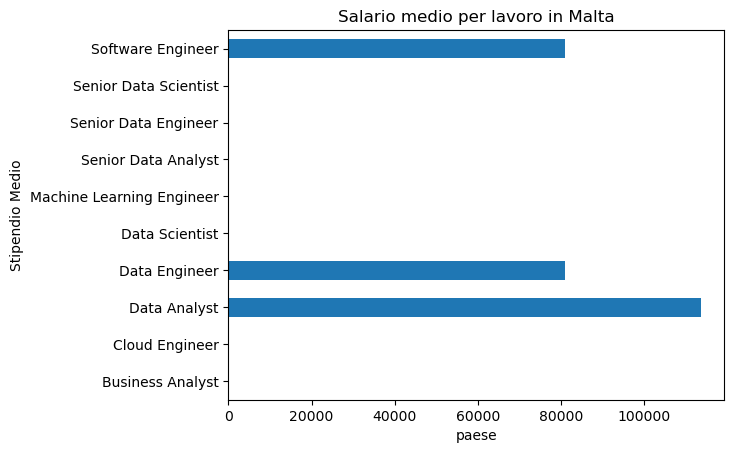

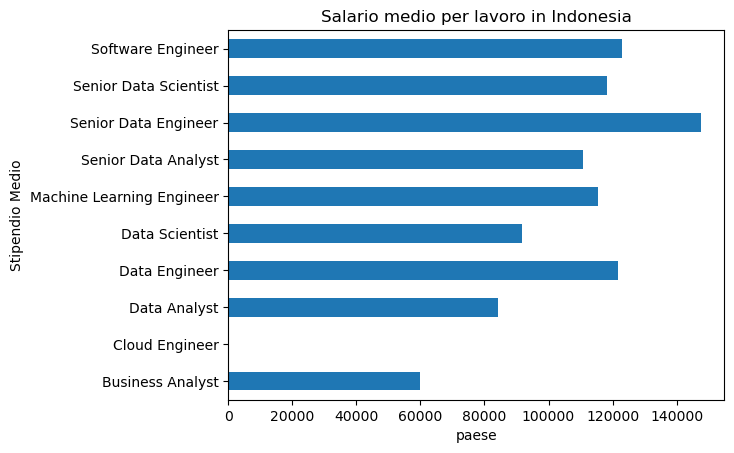

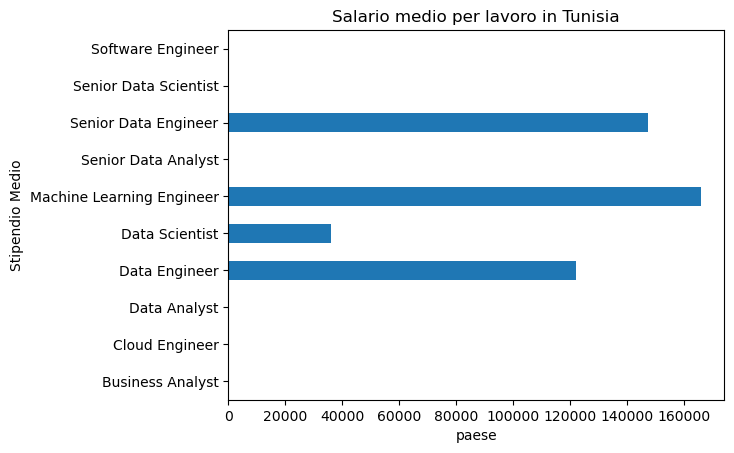

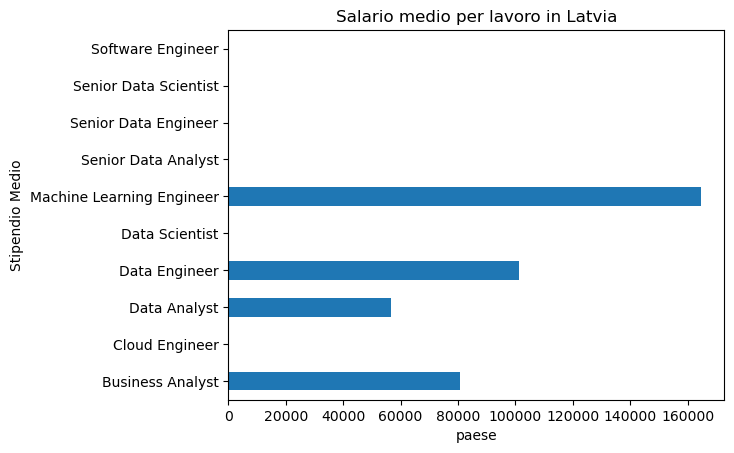

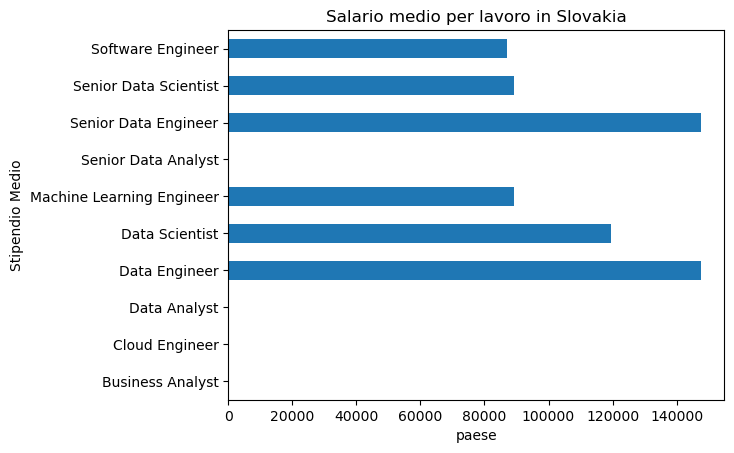

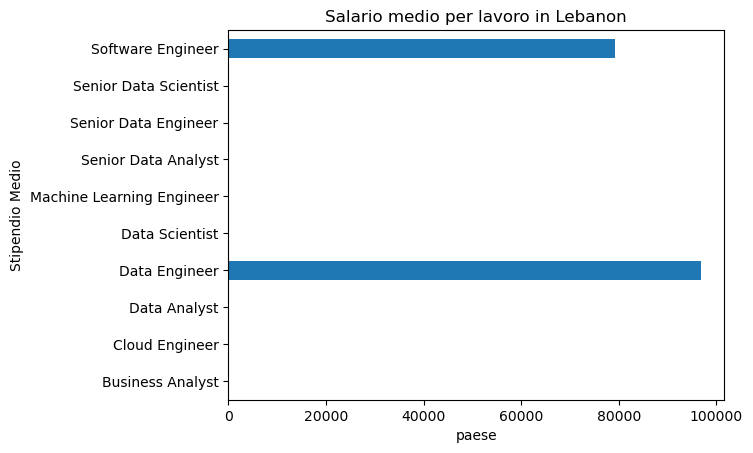

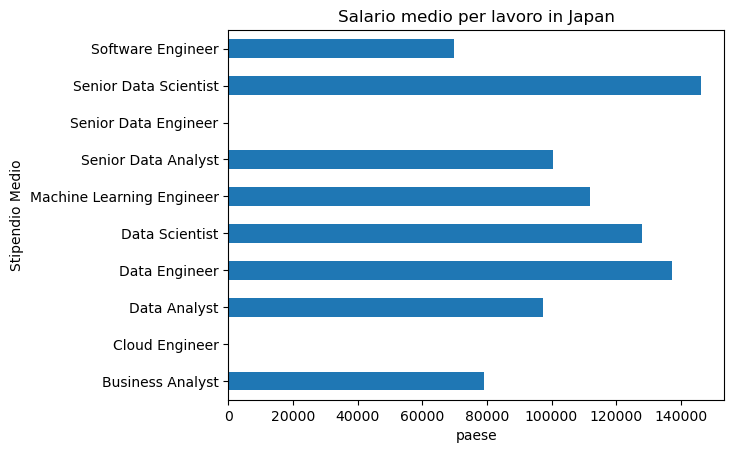

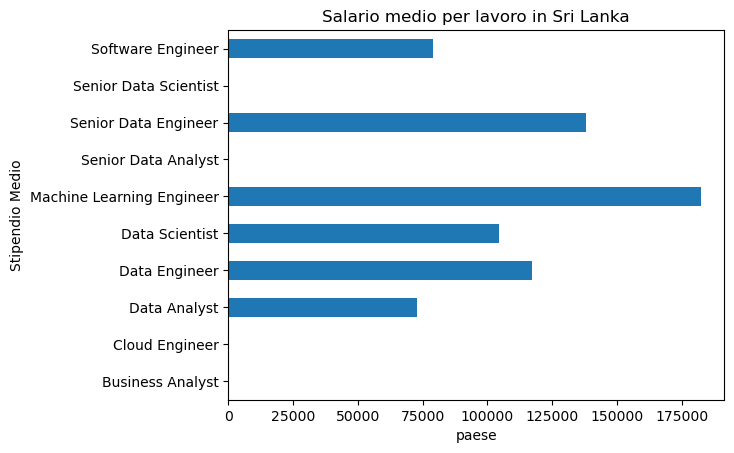

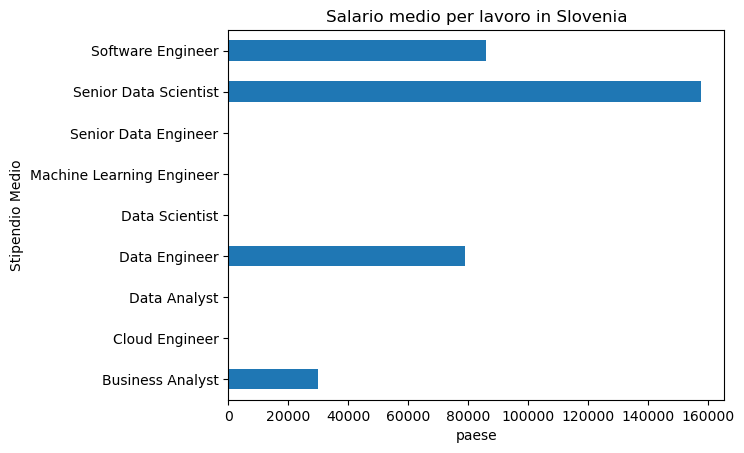

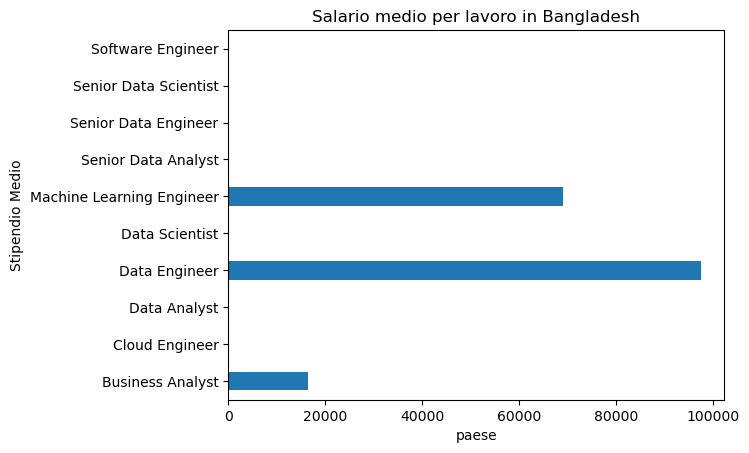

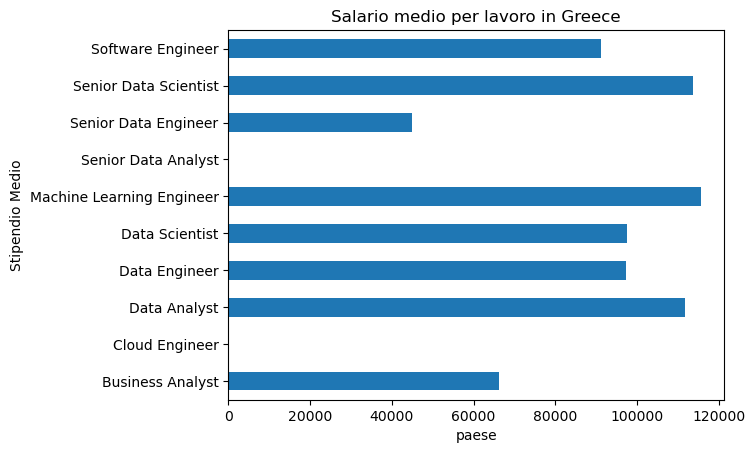

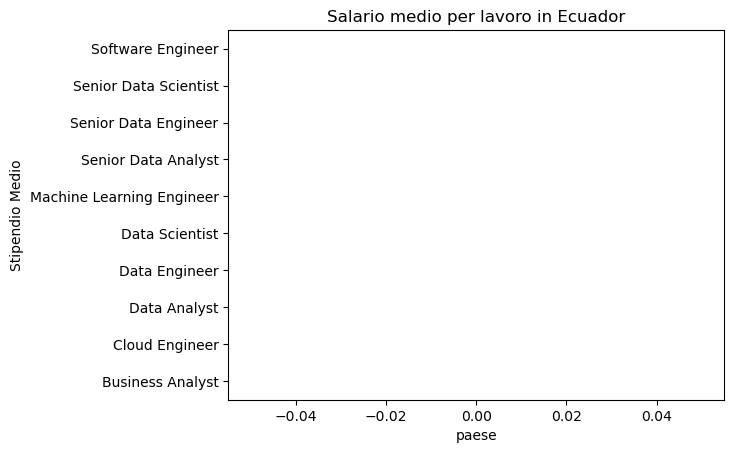

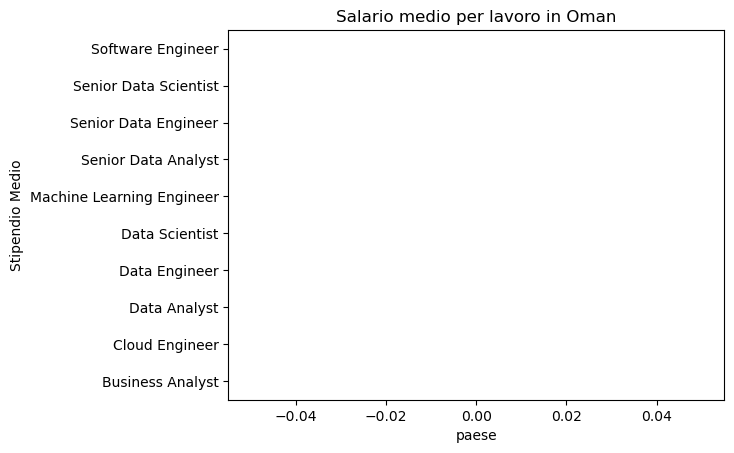

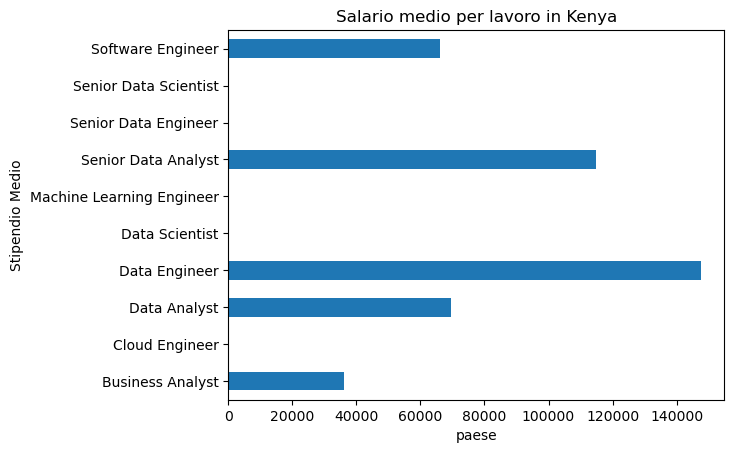

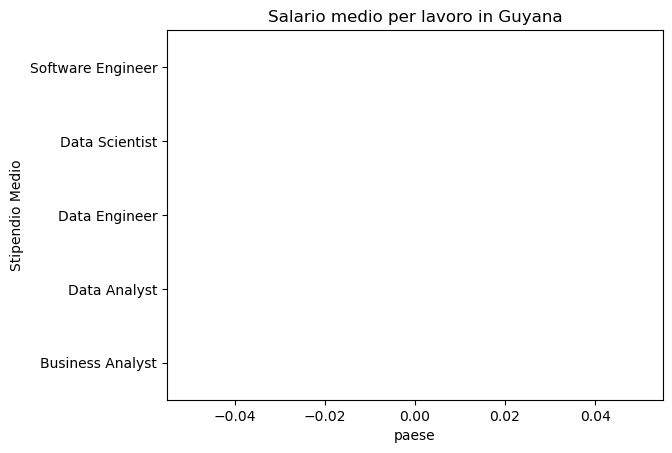

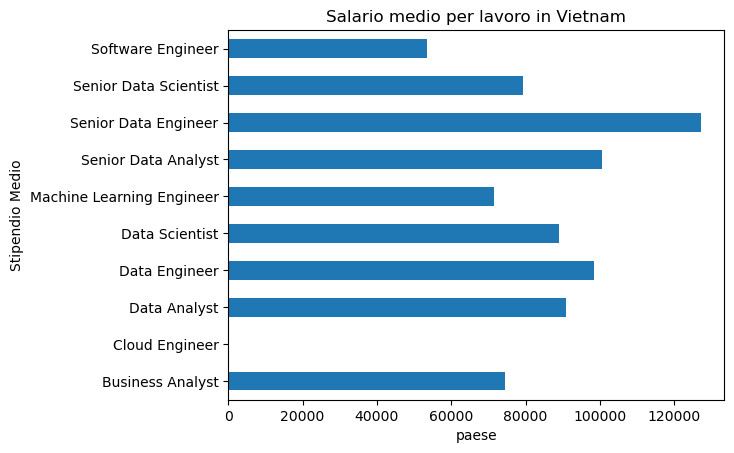

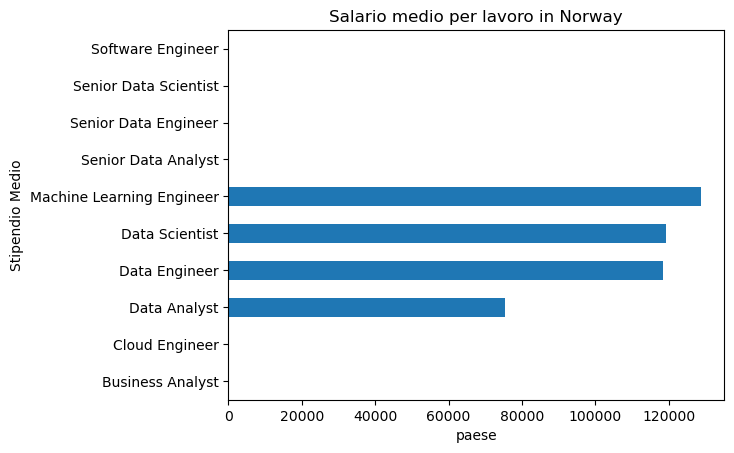

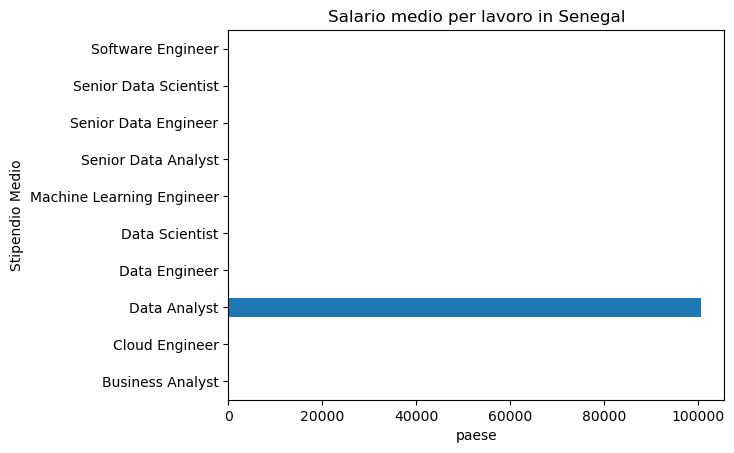

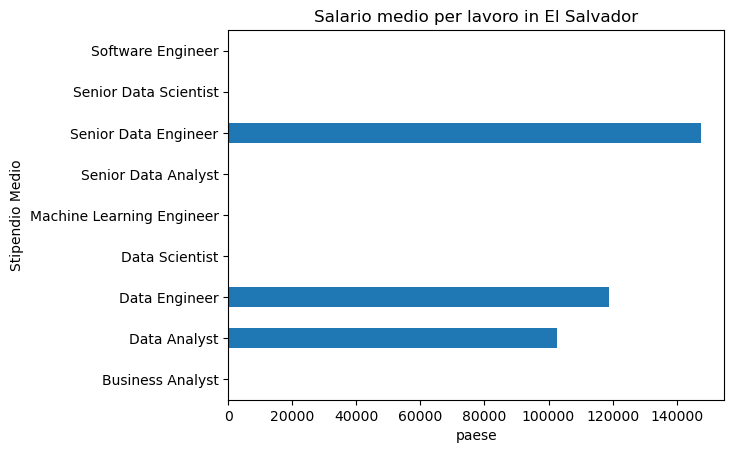

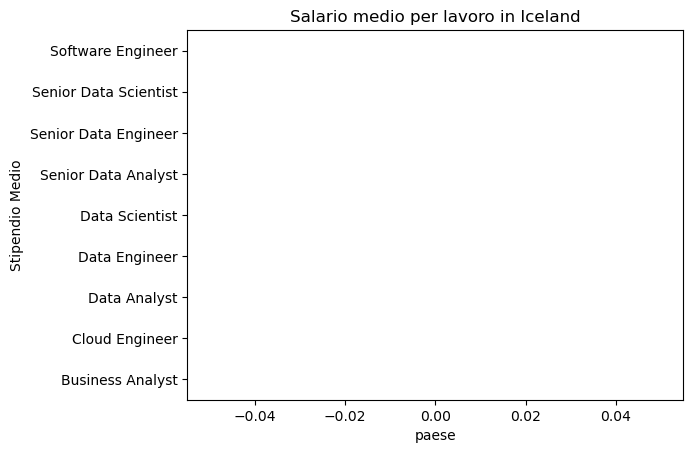

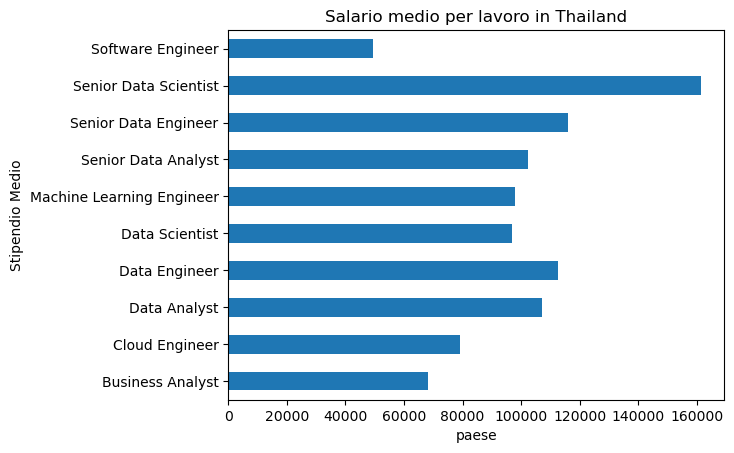

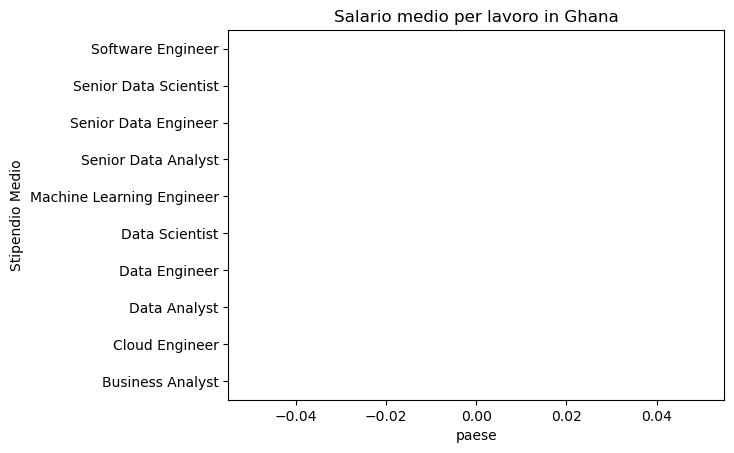

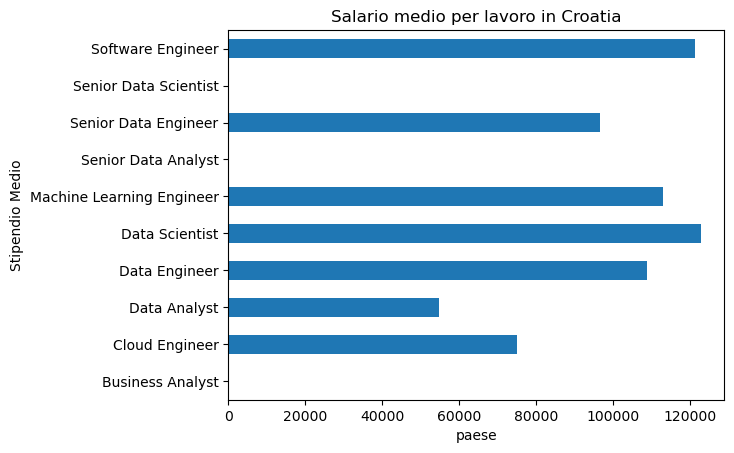

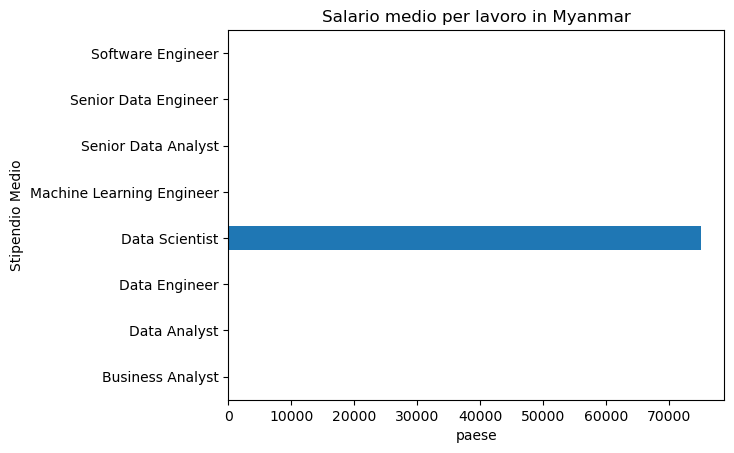

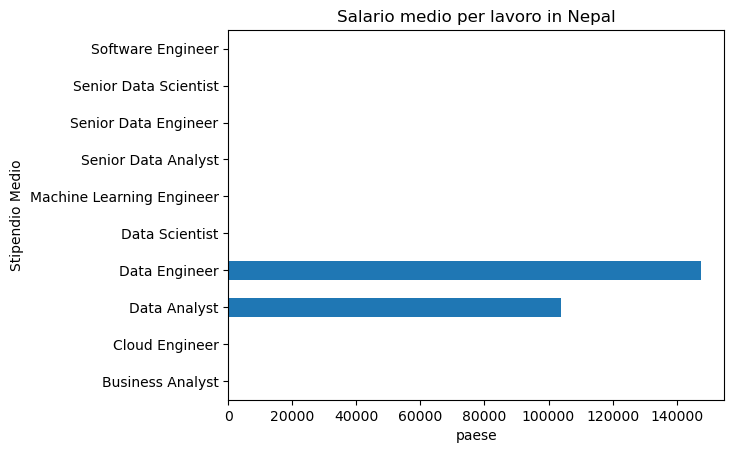

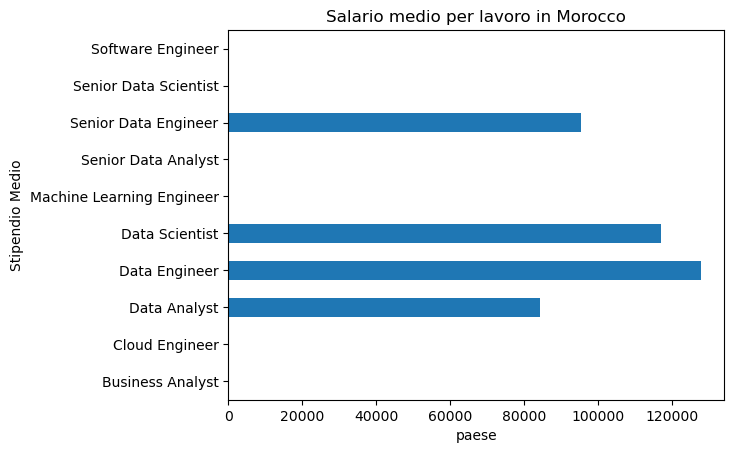

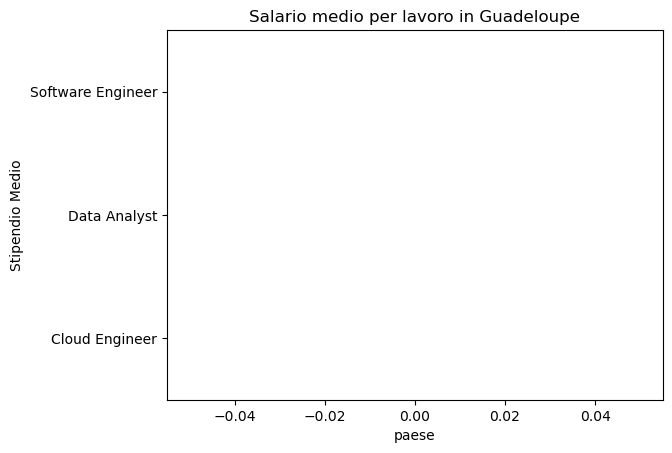

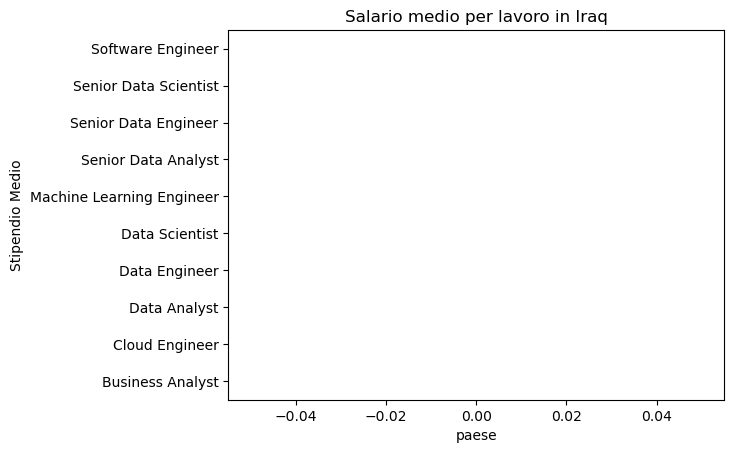

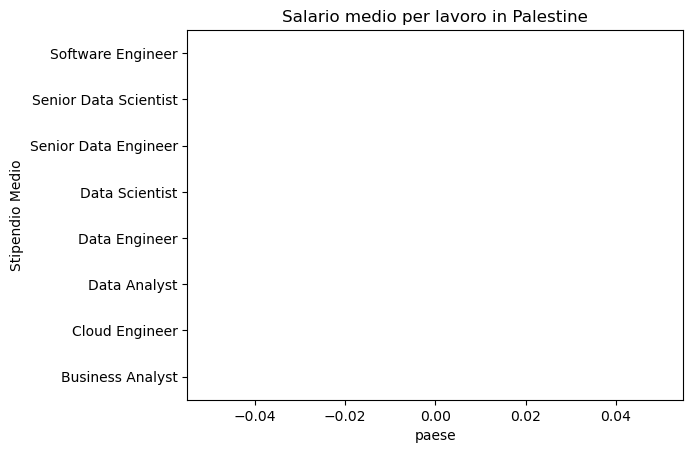

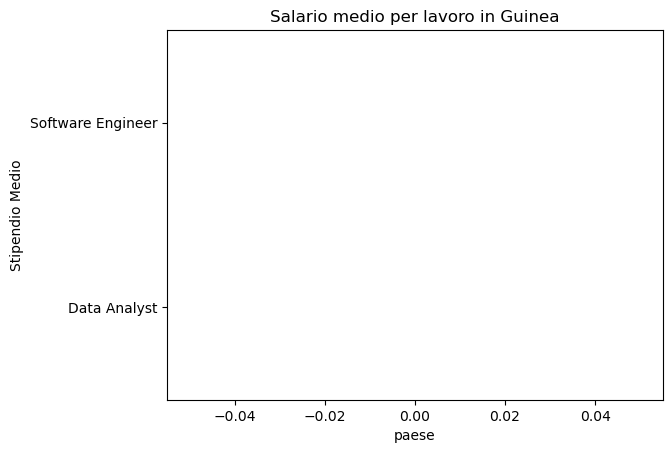

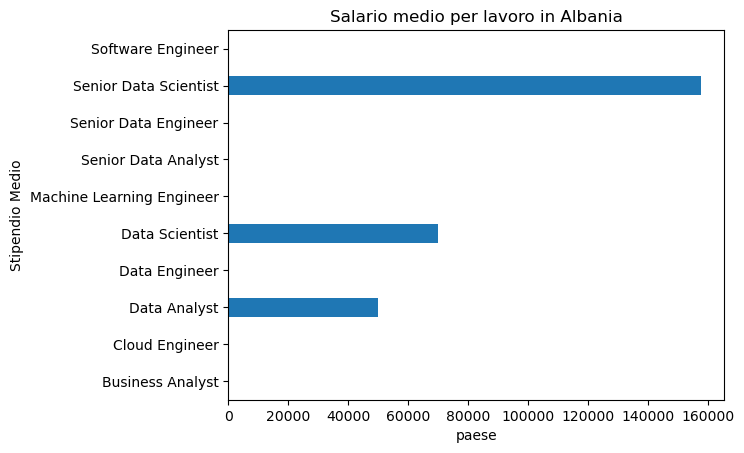

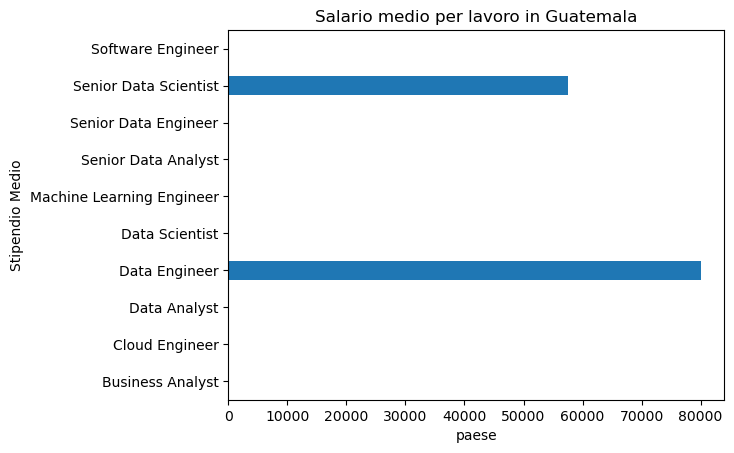

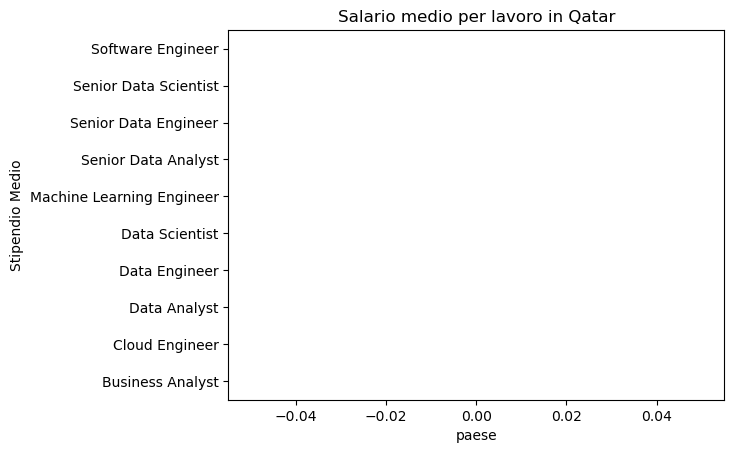

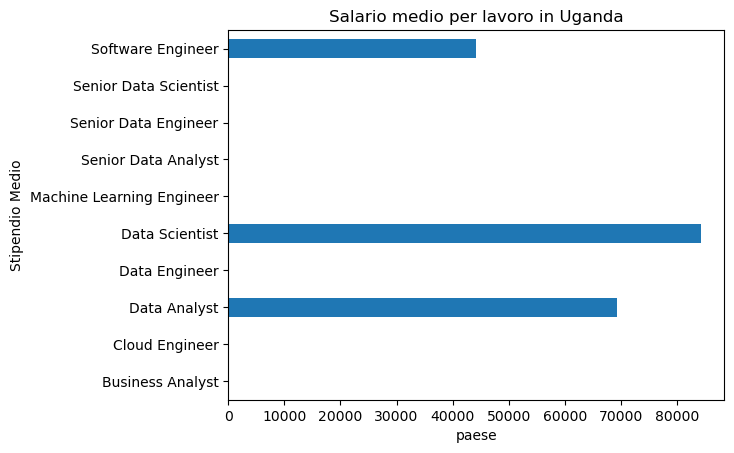

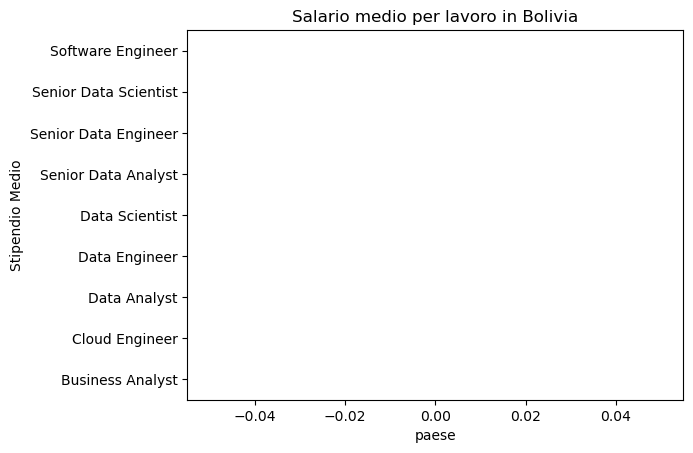

IndexError: index 0 is out of bounds for axis 0 with size 0

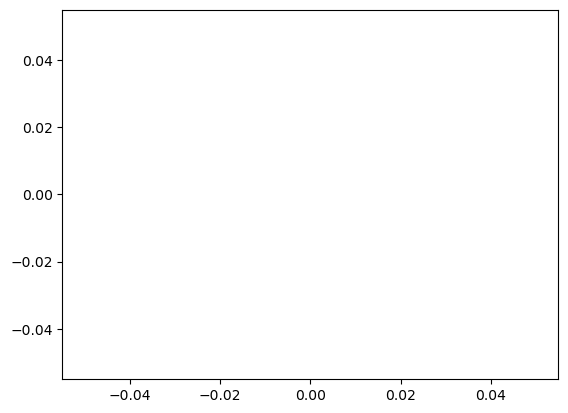

In [70]:
paesi = df['job_country'].unique()

for paese in paesi:
    dati_paese = df[df['job_country'] == paese]
    dati_lavoro = dati_paese.groupby('job_title_short')['salary_year_avg'].mean()
    dati_lavoro.plot(kind='barh')
    plt.title('Salario medio per lavoro in {}'.format(paese))
    plt.xlabel('paese')
    plt.ylabel('Stipendio Medio')
    plt.show()